In [15]:
import pandas as pd

data = pd.read_csv('../ssd_data/final_data/final_data_MA1.csv',index_col=False)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
data

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
42934,24130,2019-01-01,4.294967e+09,94.0,0.0,45496.0,40.0,100.0,0.0,100.0,...,16.0,1.400393e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.138633e+12,1
44189,2739,2019-01-01,4.294967e+09,98.0,0.0,38649.0,36.0,100.0,0.0,100.0,...,12.0,9.753575e+06,100.0,0.0,0.0,0.0,0.0,100.0,9.752286e+11,0
58368,39369,2019-01-01,4.294967e+09,96.0,0.0,37385.0,0.0,0.0,0.0,0.0,...,15.0,0.000000e+00,100.0,0.0,0.0,0.0,0.0,100.0,9.277692e+11,0
6082,15870,2019-01-01,4.294967e+09,98.0,0.0,36378.0,60.0,100.0,0.0,100.0,...,10.0,1.359197e+08,100.0,0.0,0.0,0.0,0.0,100.0,9.024233e+11,0
13419,22839,2019-01-01,4.294967e+09,98.0,0.0,40441.0,74.0,100.0,0.0,100.0,...,14.0,7.784229e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.009346e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22865,8682,2019-06-30,4.294967e+09,96.0,0.0,49991.0,27.0,100.0,0.0,100.0,...,16.0,7.339440e+07,100.0,0.0,0.0,0.0,0.0,100.0,1.271520e+12,0
55953,6209,2019-06-30,4.294967e+09,95.0,0.0,50707.0,26.0,100.0,0.0,100.0,...,16.0,1.964506e+07,100.0,0.0,0.0,0.0,0.0,100.0,1.297136e+12,0
14106,5049,2019-06-30,4.294967e+09,96.0,0.0,39151.0,28.0,100.0,0.0,100.0,...,16.0,1.992216e+06,100.0,0.0,0.0,0.0,0.0,100.0,9.925115e+11,0
4485,5490,2019-06-30,4.294967e+09,92.0,2.0,51051.0,49.0,100.0,3.0,100.0,...,18.0,1.239745e+09,99.0,2.0,0.0,0.0,0.0,1.0,1.276011e+12,0


In [16]:
#disk_id 가 520(fail 일어난) 데이터 불러오기
disk_520=data[data['disk_id']==520].copy()
disk_520=disk_520.reset_index()
del(disk_520['index'])

#datetime type으로 변경
disk_520['ds'] = pd.to_datetime(disk_520['ds'])

# set index as datetime column
disk_520.set_index('ds', inplace=True)

# 사용할 feature값들만 뽑아냄
disk_520_features=disk_520.iloc[:,1:-1]

#빈도설정 : Day / 'ffill' = 앞에 있는 데이터 값을 그대로 가져와 NAN 값을 채우는 방식
disk_520_features=disk_520_features.asfreq('D', method='ffill')

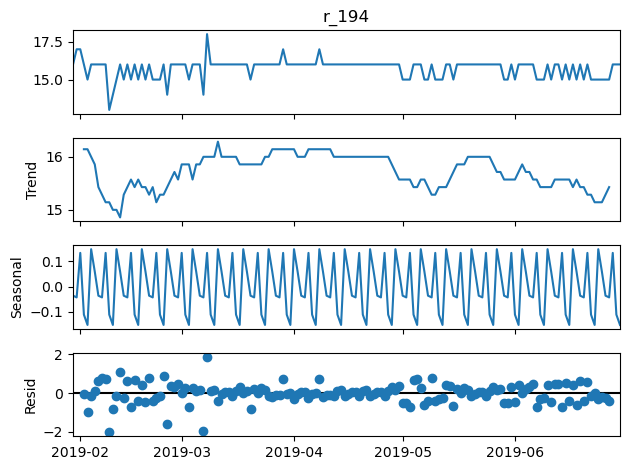

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Split Time Series Data as Trend + Seasonal + residual
sm.tsa.seasonal_decompose(disk_520_features['r_194'], model='additive').plot()
plt.show()

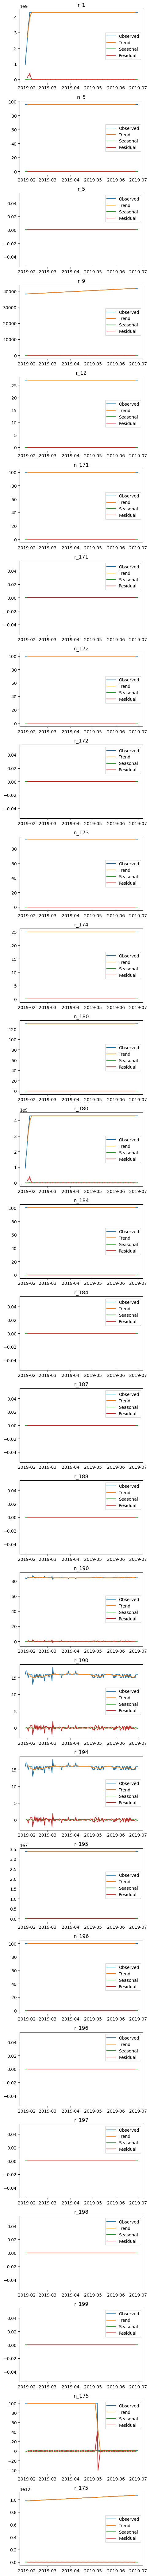

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 모든 feature에 대한 plot을 위한 subplot 설정
num_features = len(disk_520_features.columns)
fig, axes = plt.subplots(num_features, 1, figsize=(5, 3*num_features))

# 각 feature에 대한 seasonal_decompose 결과를 그래프로 그리기
for i, feature in enumerate(disk_520_features.columns):
    result = sm.tsa.seasonal_decompose(disk_520_features[feature], model='additive')
    axes[i].plot(result.observed, label='Observed')
    axes[i].plot(result.trend, label='Trend')
    axes[i].plot(result.seasonal, label='Seasonal')
    axes[i].plot(result.resid, label='Residual')
    axes[i].set_title(feature)
    axes[i].legend()

# 그래프 출력
plt.tight_layout()
plt.show()

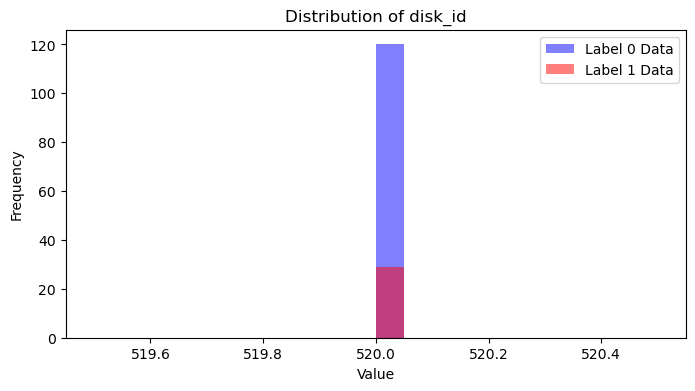

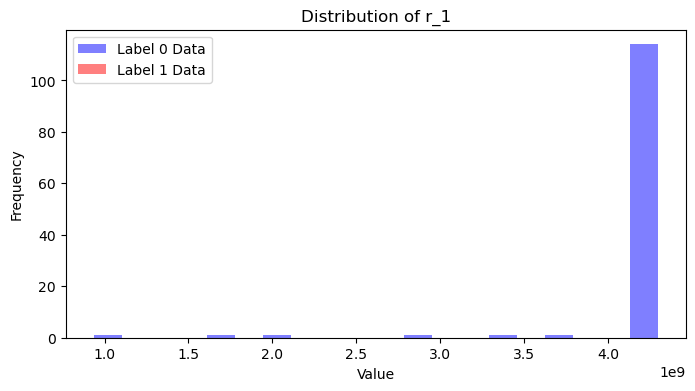

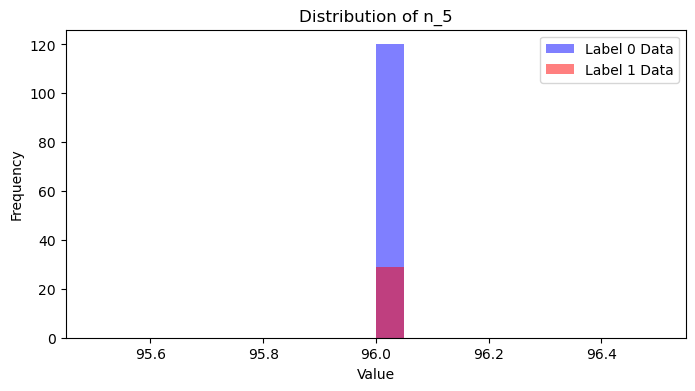

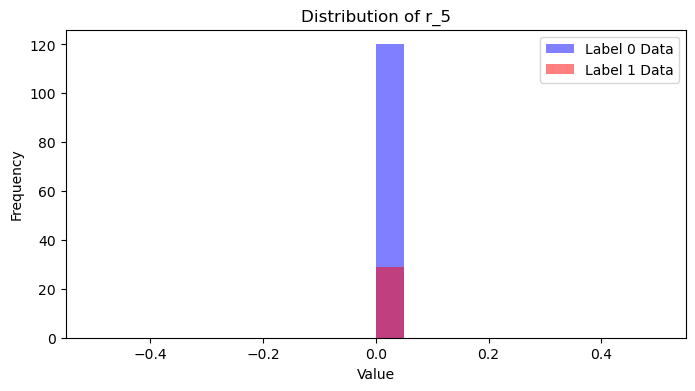

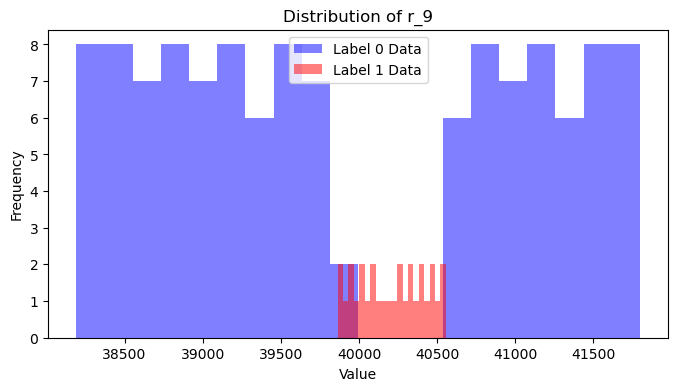

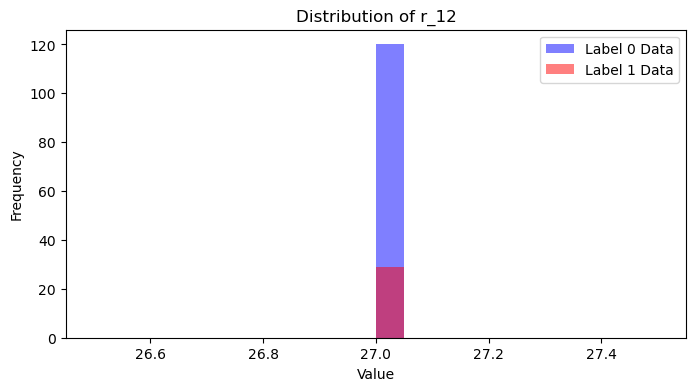

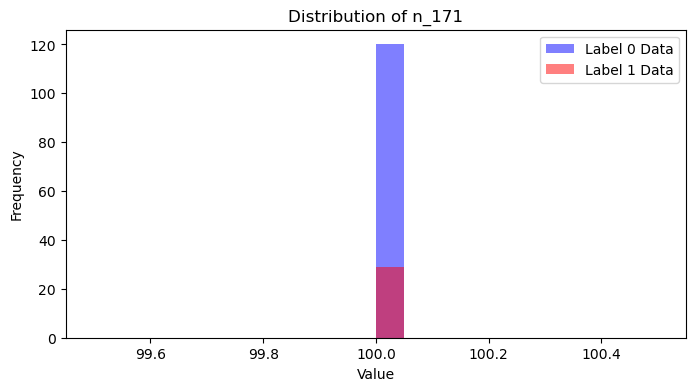

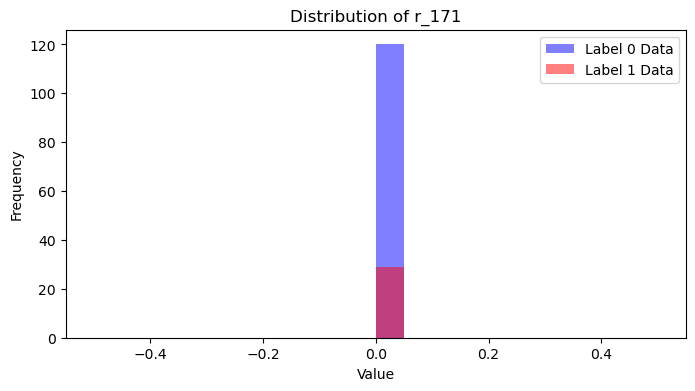

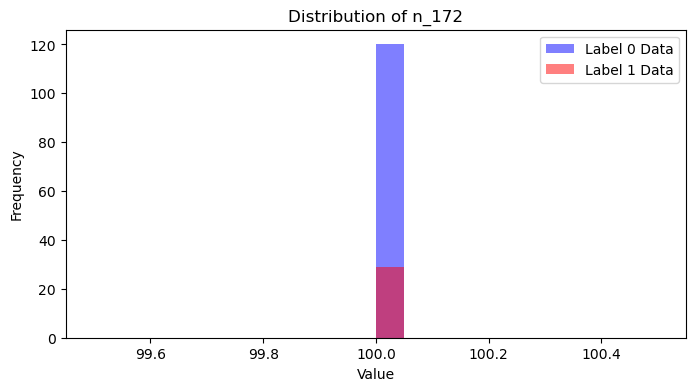

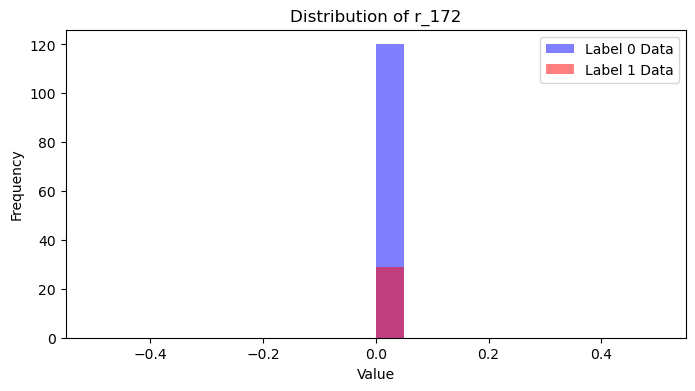

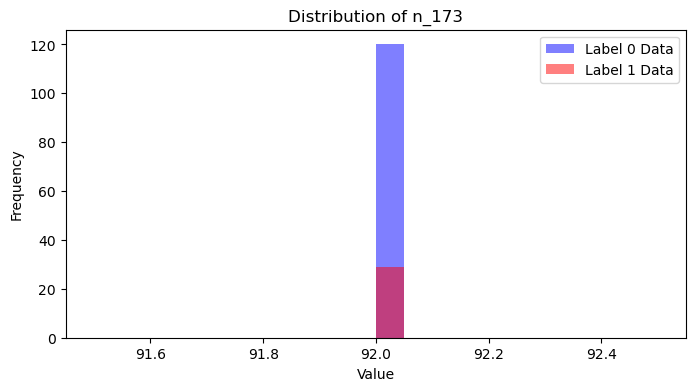

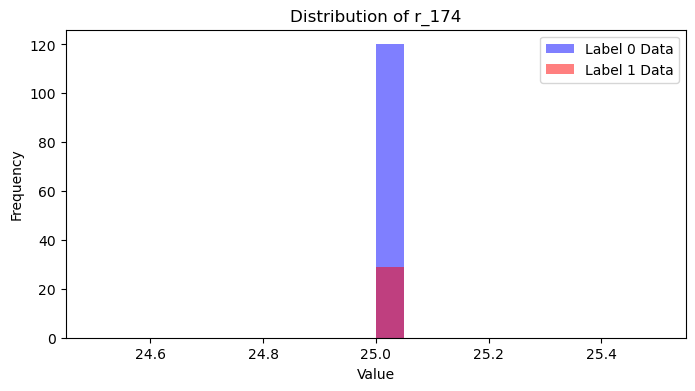

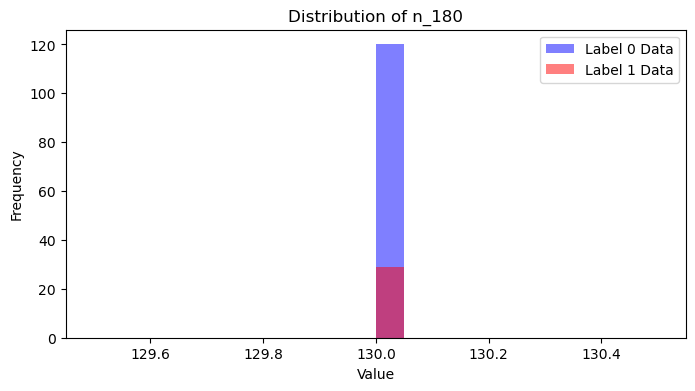

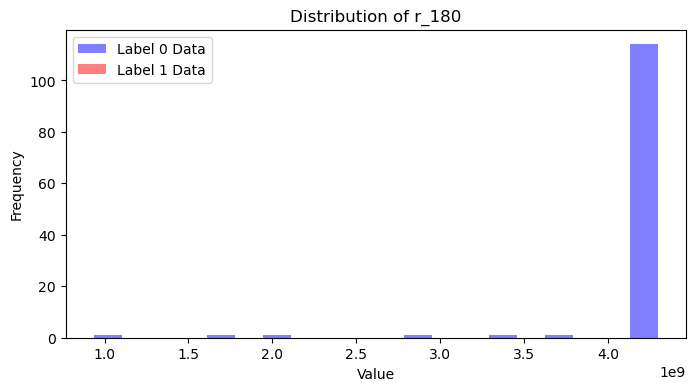

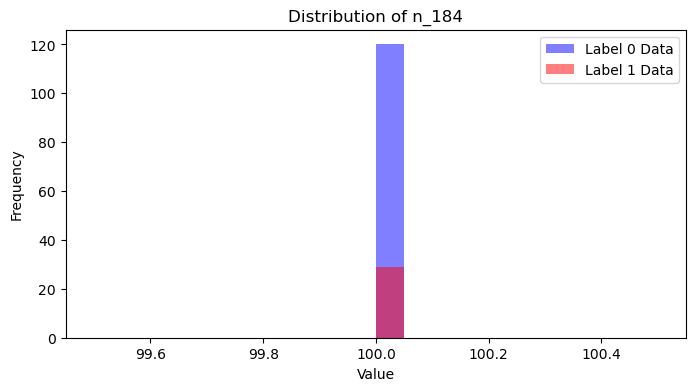

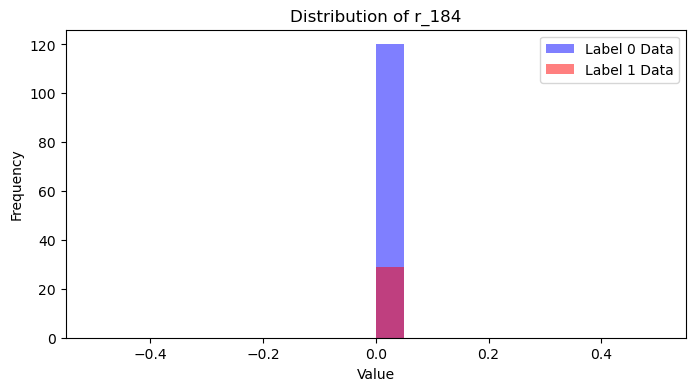

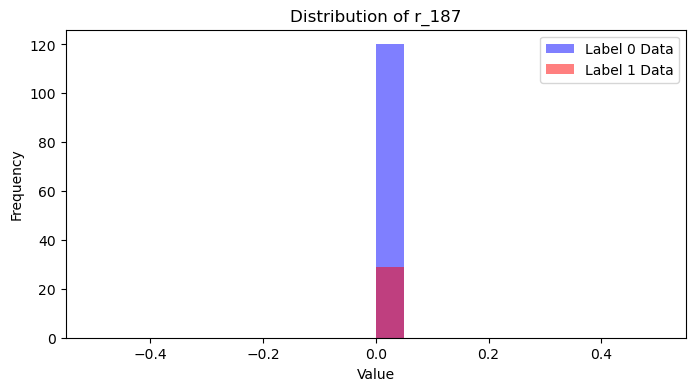

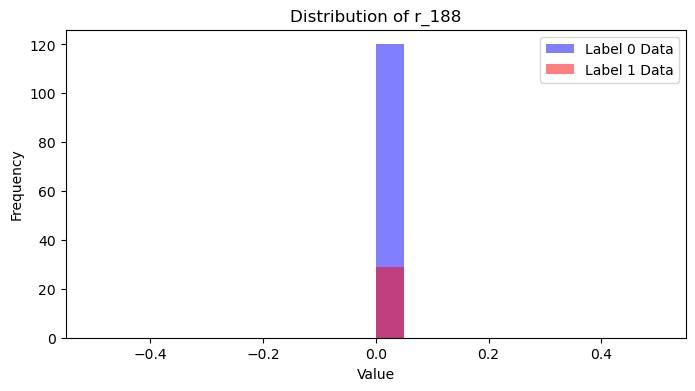

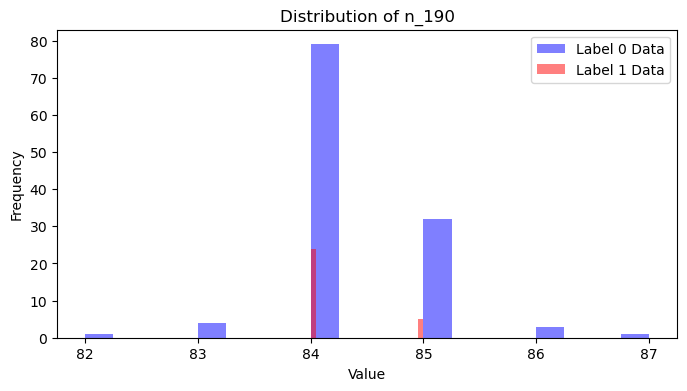

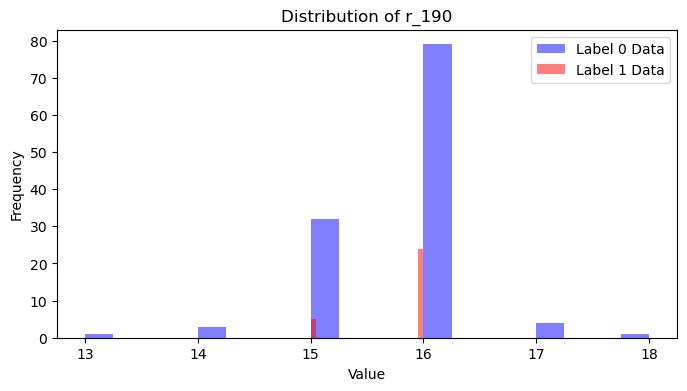

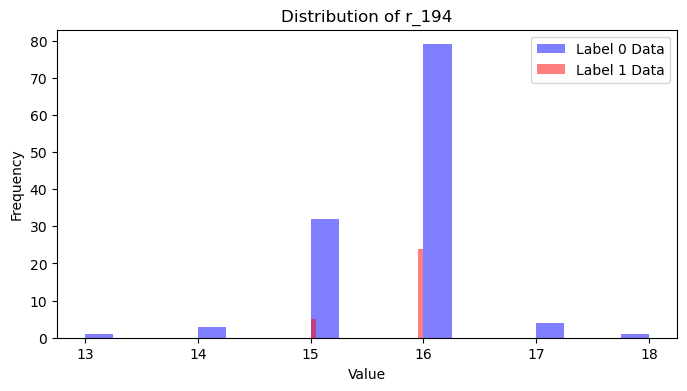

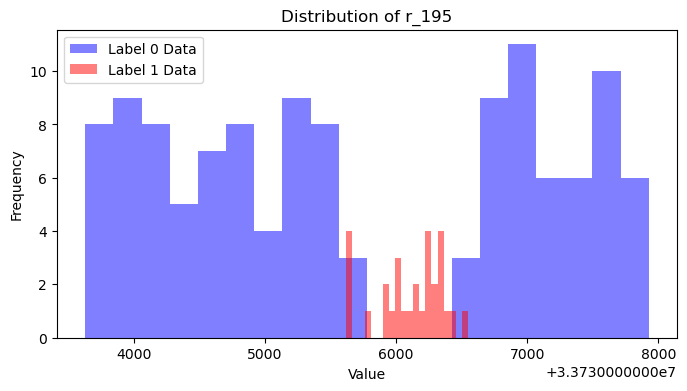

In [21]:
import matplotlib.pyplot as plt

label_1_data = disk_520[disk_520['label'] == 1]  # label이 1인 데이터만 선택
label_0_data = disk_520[disk_520['label'] == 0]  # label이 0인 데이터만 선택
# 각 feature에 대한 분포 확인
for feature in label_1_data.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(label_0_data[feature], bins=20, color='blue', alpha=0.5, label='Label 0 Data')
    plt.hist(label_1_data[feature], bins=20, color='red', alpha=0.5, label='Label 1 Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

In [20]:
label_1_data = disk_520[disk_520['label'] == 1]  # label이 1인 데이터만 선택
last_occurrence_ds = label_1_data.index.max()  # 마지막으로 나타난 시점
last_occurrence_ds

Timestamp('2019-05-09 00:00:00')

### fail 여러번 일어나는지 여부 확인

In [1]:
import pandas as pd

MA1 = pd.DataFrame()
for chunk in pd.read_csv("../ssd_data/combined_by_diskmodel/combined_MA1.csv", chunksize=1000000):
    MA1 = pd.concat([MA1, chunk], ignore_index=True)
del(MA1['index'])

,index,disk_id,ds,model,n_1,r_1,n_5,r_5,n_9,r_9,...,n_233,n_241,r_241,n_242,r_242,r_244,n_175,r_175,n_232,label
0,45,10045,20190101,MA1,130.0,4.294967e+09,97.0,0.0,100.0,38288.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,9.752124e+11,NaN,0
1,50,10048,20190101,MA1,130.0,4.294967e+09,96.0,0.0,100.0,38288.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,9.752134e+11,NaN,0
2,69,10066,20190101,MA1,130.0,4.294967e+09,96.0,0.0,100.0,46396.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.185723e+12,NaN,0
3,86,10083,20190101,MA1,130.0,4.294967e+09,98.0,0.0,100.0,39978.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.014085e+12,NaN,0
4,129,10122,20190101,MA1,130.0,4.294967e+09,97.0,0.0,100.0,45592.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.151518e+12,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744310,11267559,9838,20190630,MA1,130.0,4.294967e+09,97.0,0.0,100.0,43197.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.086756e+12,NaN,0
4744311,11267567,9842,20190630,MA1,130.0,5.896511e+06,98.0,0.0,100.0,42705.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.078410e+12,NaN,0
4744312,11267600,9878,20190630,MA1,130.0,4.294967e+09,96.0,0.0,100.0,41465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.048160e+12,NaN,0
4744313,11267700,9970,20190630,MA1,130.0,4.294967e+09,96.0,0.0,100.0,46623.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.164486e+12,NaN,0


In [3]:
del(MA1['index'])

In [12]:
disk_id_counts = MA1[MA1['label'] == 1].groupby('disk_id').size()
disk_id_counts

disk_id
520      1
1156     1
1224     1
1225     1
1230     1
        ..
42763    1
42764    1
42767    1
42815    1
42824    1
Length: 275, dtype: int64

In [10]:
lable_1 = MA1[MA1['label'] == 1]
lable_1

,index,disk_id,ds,model,n_1,r_1,n_5,r_5,n_9,r_9,...,n_233,n_241,r_241,n_242,r_242,r_244,n_175,r_175,n_232,label
55019,792333,3401,20190102,MA1,130.0,4.294967e+09,98.0,0.0,100.0,40012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.005077e+12,NaN,1
55936,808516,23729,20190102,MA1,130.0,4.294967e+09,98.0,2.0,100.0,40175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.018337e+12,NaN,1
70405,1016962,41793,20190103,MA1,130.0,4.294967e+09,98.0,0.0,100.0,36522.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,9.280304e+11,NaN,1
75070,1088911,30146,20190103,MA1,130.0,4.294967e+09,98.0,0.0,100.0,36922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,9.407059e+11,NaN,1
106266,1554956,37927,20190104,MA1,130.0,4.294967e+09,94.0,141.0,100.0,37481.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,9.497040e+11,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132300,1152548,33445,20190603,MA1,130.0,4.294967e+09,96.0,0.0,100.0,44625.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.134050e+12,NaN,1
4175174,1890325,1230,20190605,MA1,130.0,4.294967e+09,98.0,0.0,100.0,44244.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.125316e+12,NaN,1
4178901,1951597,34874,20190605,MA1,130.0,4.294967e+09,98.0,0.0,100.0,40585.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.035432e+12,NaN,1
4182969,2022064,31327,20190606,MA1,130.0,4.294967e+09,98.0,0.0,100.0,42078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.057160e+12,NaN,1


fail이 여러번 일어나지는 않는다!

### MA1에서 failure disk 몇개에 대해서..

In [10]:
# null값이 있는 열을 제거하는 코드
def remove_null_columns(df):
    # null인 컬럼을 확인하고, 모든 값이 null인 컬럼을 찾습니다.
    null_columns = df.columns[df.isnull().all()]
    
    # 모든 값이 null인 컬럼을 DataFrame에서 제거합니다.
    df = df.drop(null_columns, axis=1)
    
    return df
# 하나의 unique한 값으로만 이루어진 컬럼을 제거하는 코드
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_cols.append(col)

    df_filtered = df.drop(single_value_cols, axis=1)
    return df_filtered

MA1 = remove_null_columns(MA1)
MA1 = remove_single_value_columns(MA1)
MA1=MA1.fillna(-1)

In [11]:
MA1

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
0,10045,20190101,4.294967e+09,97.0,0.0,38288.0,-1.0,-1.0,-1.0,-1.0,...,12.0,-1.000000e+00,100.0,0.0,-1.0,-1.0,-1.0,100.0,9.752124e+11,0
1,10048,20190101,4.294967e+09,96.0,0.0,38288.0,-1.0,-1.0,-1.0,-1.0,...,12.0,-1.000000e+00,100.0,0.0,-1.0,-1.0,-1.0,100.0,9.752134e+11,0
2,10066,20190101,4.294967e+09,96.0,0.0,46396.0,25.0,100.0,0.0,100.0,...,17.0,5.812974e+07,100.0,0.0,0.0,0.0,0.0,100.0,1.185723e+12,0
3,10083,20190101,4.294967e+09,98.0,0.0,39978.0,35.0,100.0,0.0,100.0,...,12.0,1.768128e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.014085e+12,0
4,10122,20190101,4.294967e+09,97.0,0.0,45592.0,18.0,100.0,0.0,100.0,...,14.0,3.268254e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.151518e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744310,9838,20190630,4.294967e+09,97.0,0.0,43197.0,42.0,100.0,0.0,100.0,...,17.0,4.086464e+07,100.0,0.0,0.0,0.0,0.0,100.0,1.086756e+12,0
4744311,9842,20190630,5.896511e+06,98.0,0.0,42705.0,49.0,100.0,0.0,100.0,...,14.0,1.053442e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.078410e+12,0
4744312,9878,20190630,4.294967e+09,96.0,0.0,41465.0,-1.0,-1.0,-1.0,-1.0,...,14.0,-1.000000e+00,100.0,0.0,-1.0,-1.0,-1.0,1.0,1.048160e+12,0
4744313,9970,20190630,4.294967e+09,96.0,0.0,46623.0,44.0,100.0,0.0,100.0,...,14.0,3.969807e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.164486e+12,0


In [21]:
disk_520 = MA1[MA1['disk_id']==520]
disk_520

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
821858,520,20190130,9.376596e+08,96.0,0.0,38191.0,27.0,100.0,0.0,100.0,...,16.0,33733630.0,100.0,0.0,0.0,0.0,0.0,100.0,9.793172e+11,0
858376,520,20190131,1.624577e+09,96.0,0.0,38215.0,27.0,100.0,0.0,100.0,...,17.0,33733726.0,100.0,0.0,0.0,0.0,0.0,100.0,9.794111e+11,0
873871,520,20190201,2.014090e+09,96.0,0.0,38239.0,27.0,100.0,0.0,100.0,...,17.0,33733759.0,100.0,0.0,0.0,0.0,0.0,100.0,9.795051e+11,0
907339,520,20190202,2.812968e+09,96.0,0.0,38263.0,27.0,100.0,0.0,100.0,...,16.0,33733774.0,100.0,0.0,0.0,0.0,0.0,100.0,9.795990e+11,0
943568,520,20190203,3.442008e+09,96.0,0.0,38287.0,27.0,100.0,0.0,100.0,...,15.0,33733798.0,100.0,0.0,0.0,0.0,0.0,100.0,9.796929e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4629772,520,20190626,4.294967e+09,96.0,0.0,41702.0,27.0,100.0,0.0,100.0,...,15.0,33737766.0,100.0,0.0,0.0,0.0,0.0,1.0,1.065810e+12,0
4670982,520,20190627,4.294967e+09,96.0,0.0,41726.0,27.0,100.0,0.0,100.0,...,15.0,33737875.0,100.0,0.0,0.0,0.0,0.0,1.0,1.069539e+12,0
4680926,520,20190628,4.294967e+09,96.0,0.0,41750.0,27.0,100.0,0.0,100.0,...,16.0,33737918.0,100.0,0.0,0.0,0.0,0.0,1.0,1.069633e+12,0
4699434,520,20190629,4.294967e+09,96.0,0.0,41774.0,27.0,100.0,0.0,100.0,...,16.0,33737926.0,100.0,0.0,0.0,0.0,0.0,1.0,1.069727e+12,0


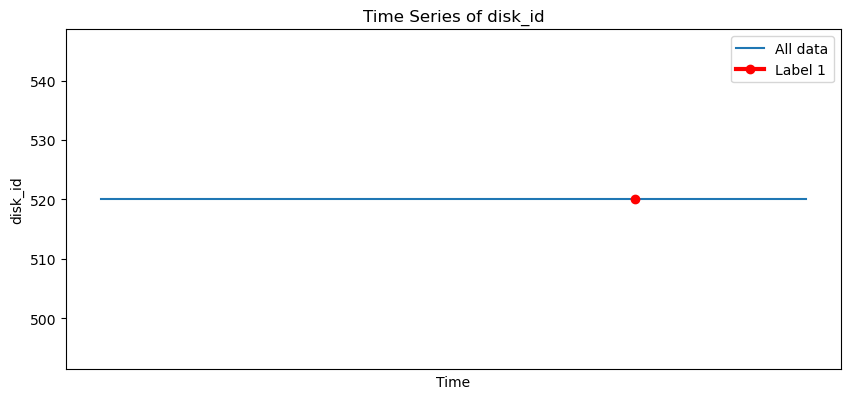

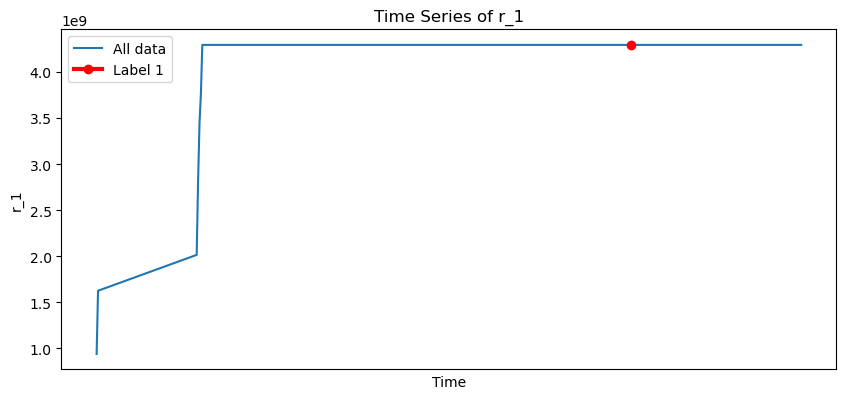

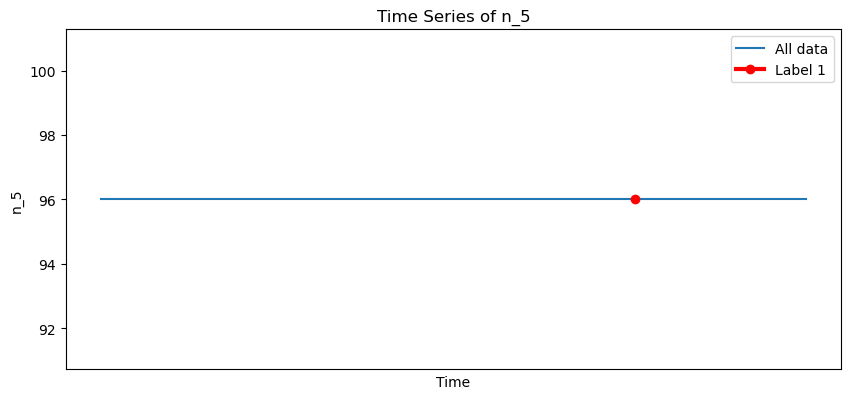

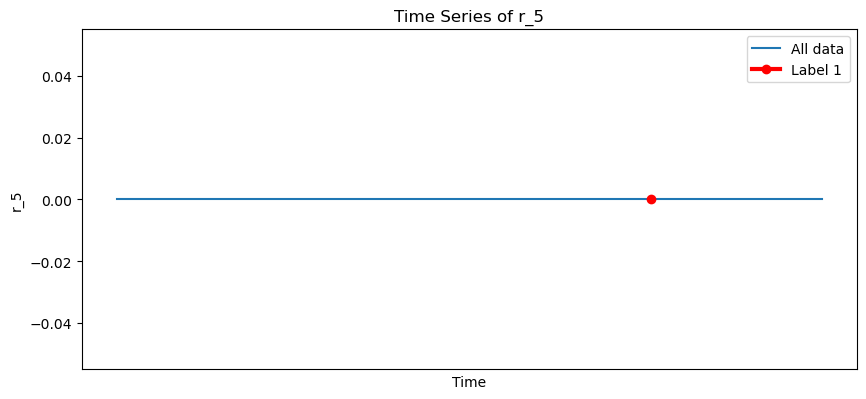

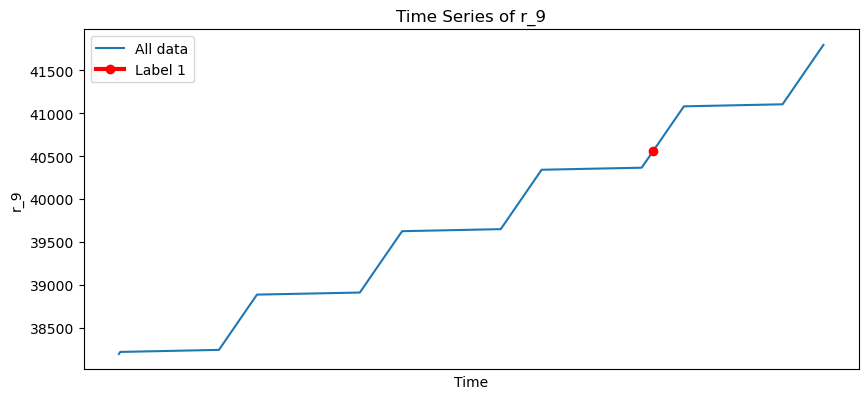

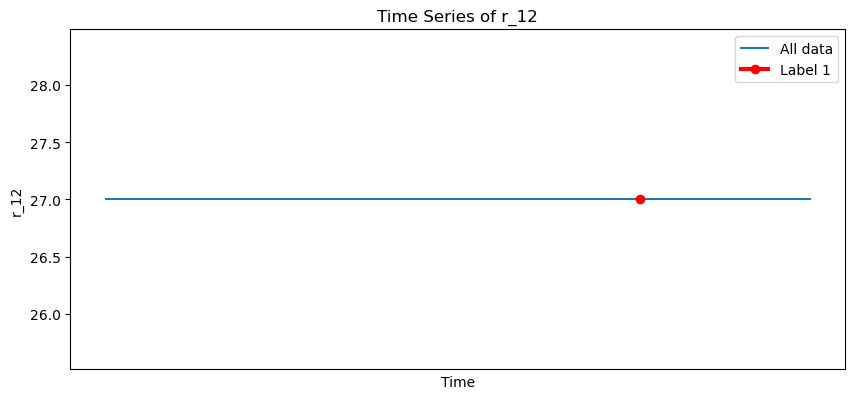

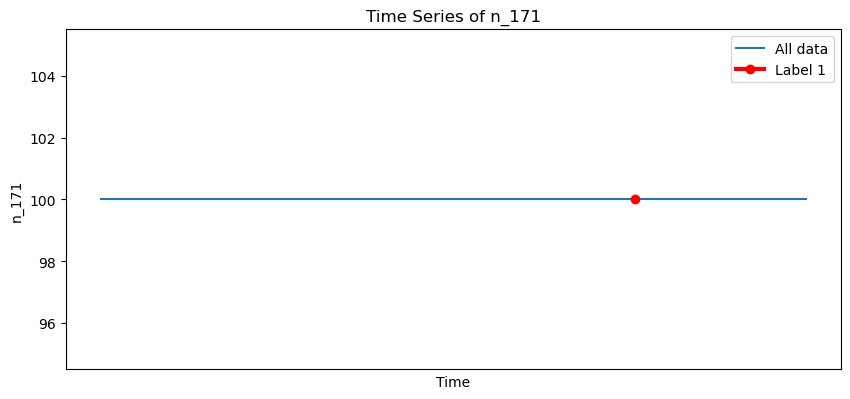

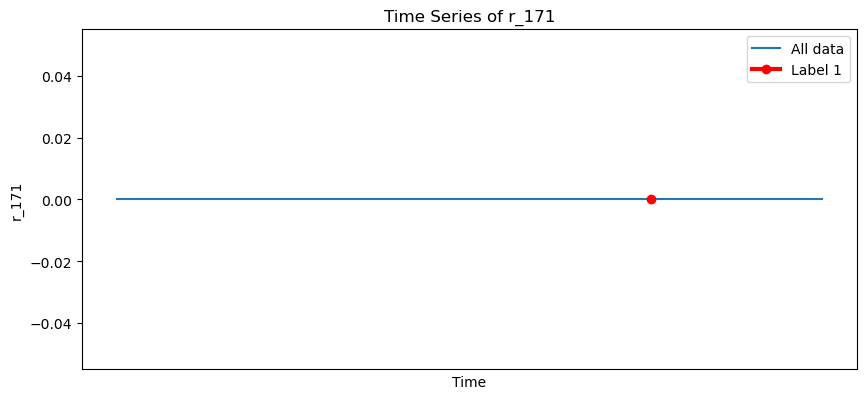

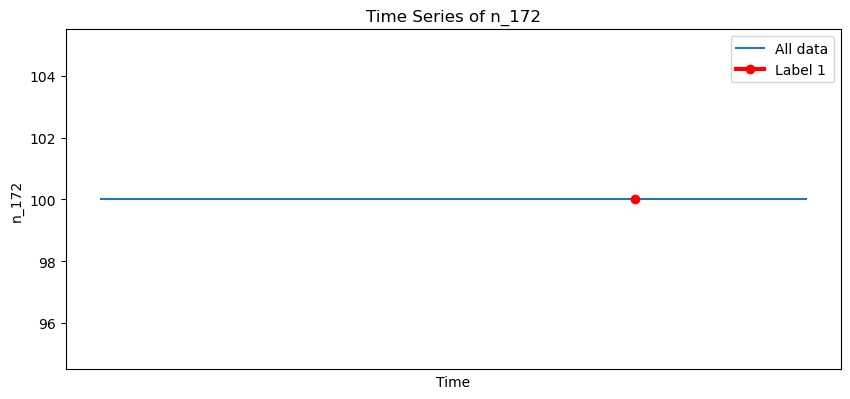

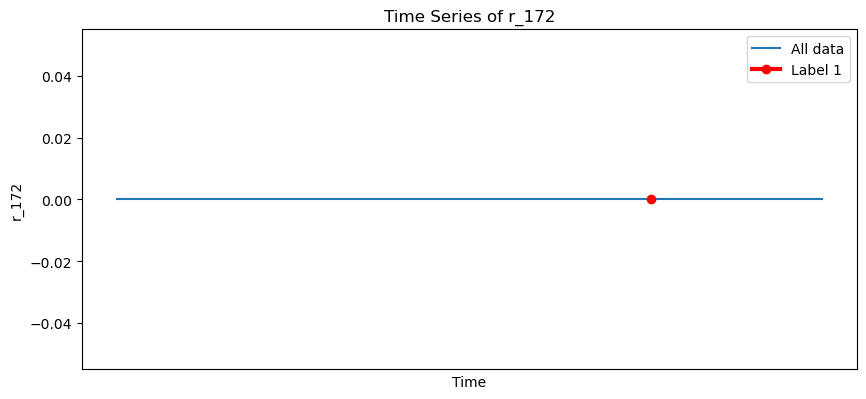

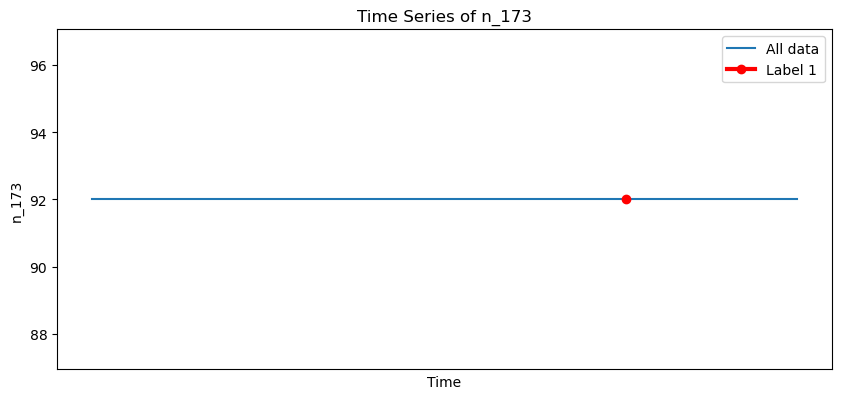

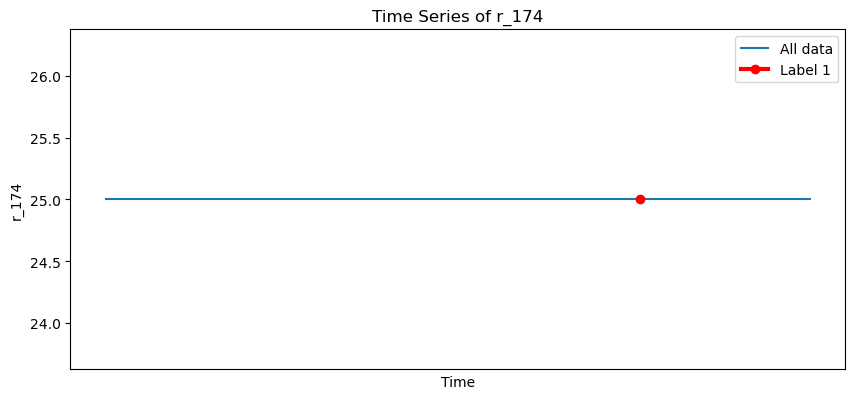

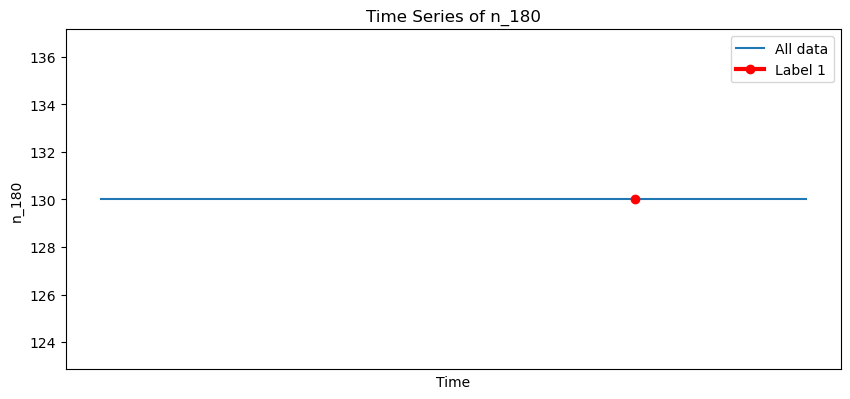

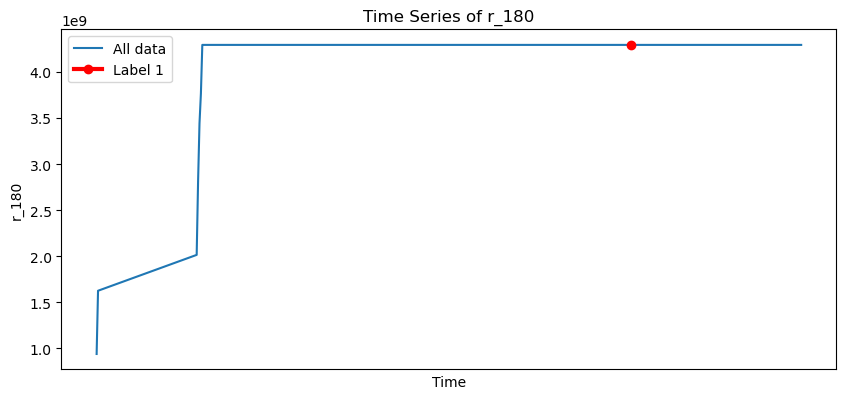

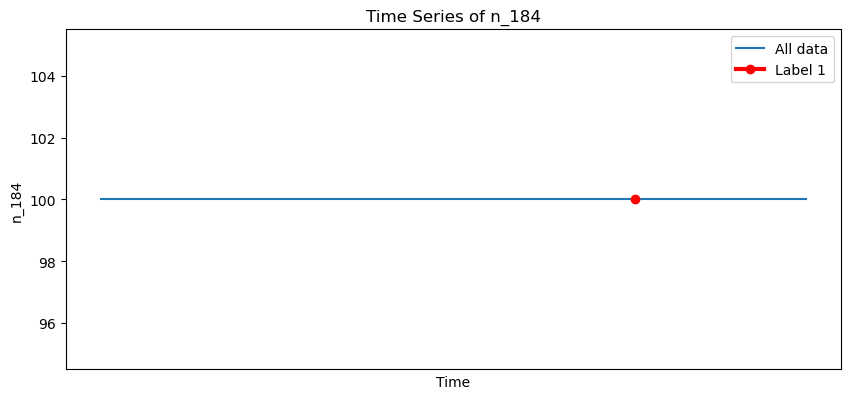

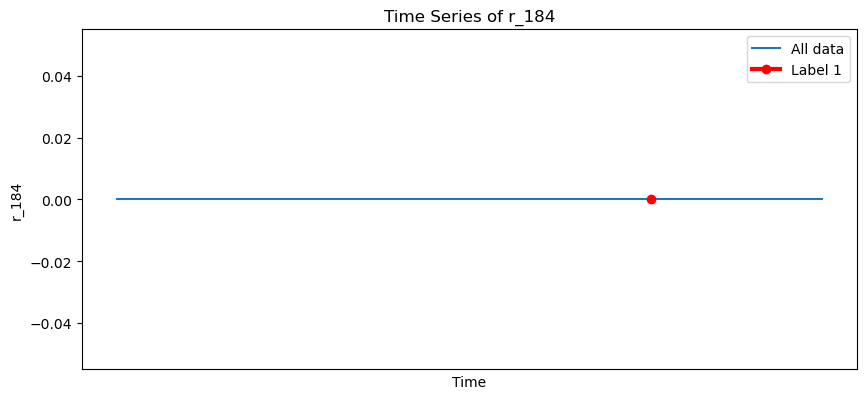

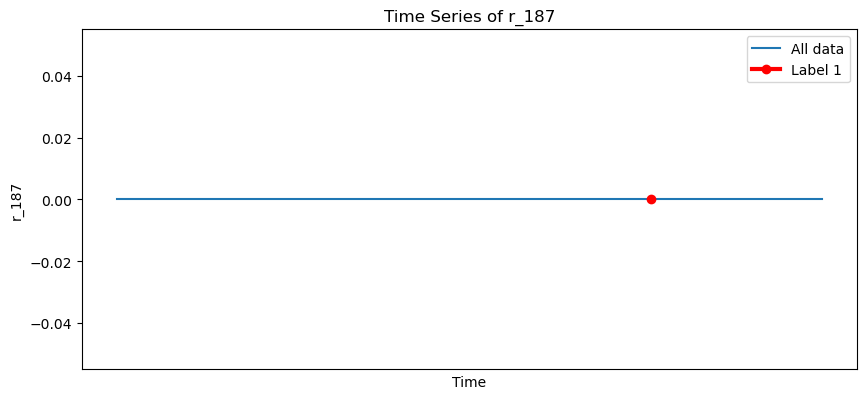

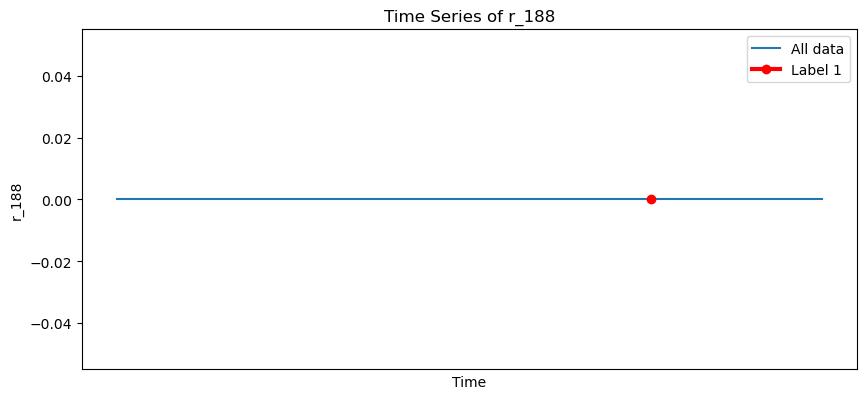

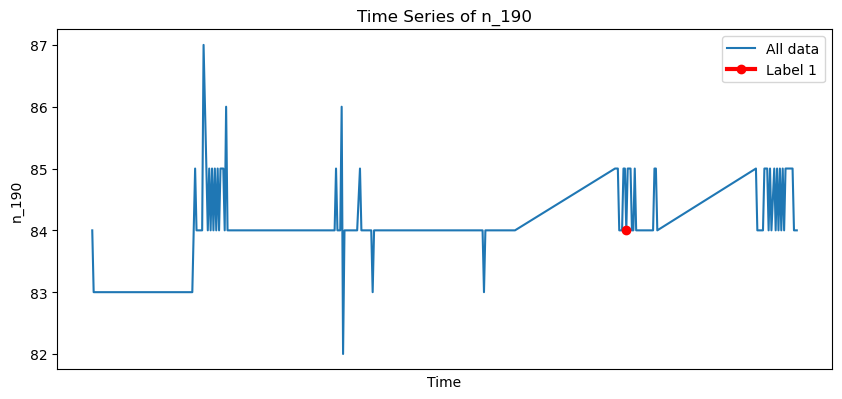

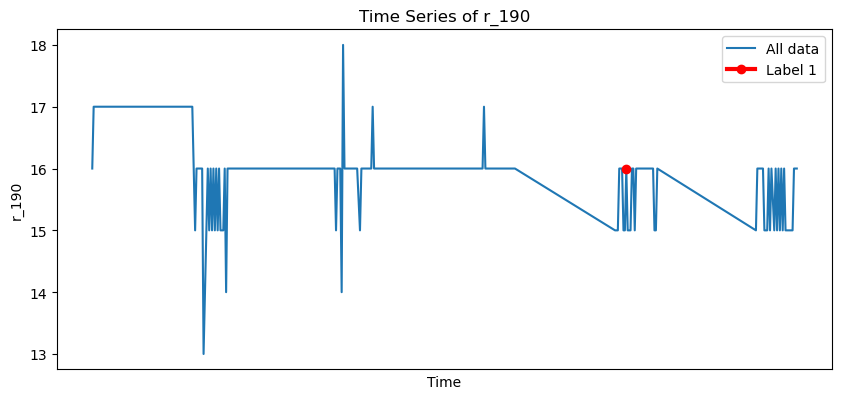

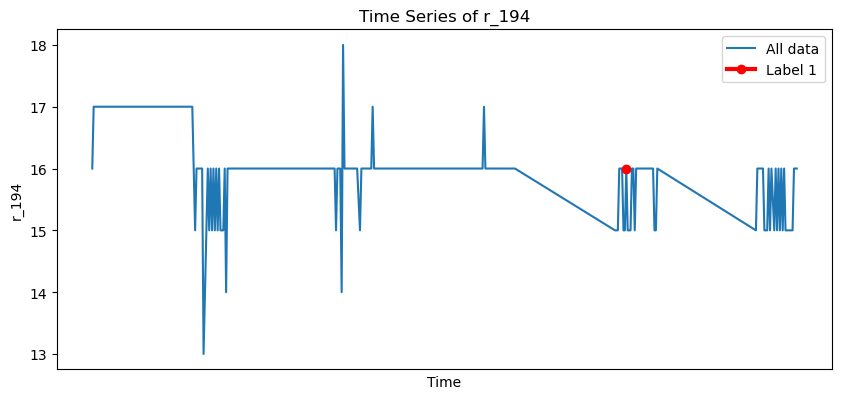

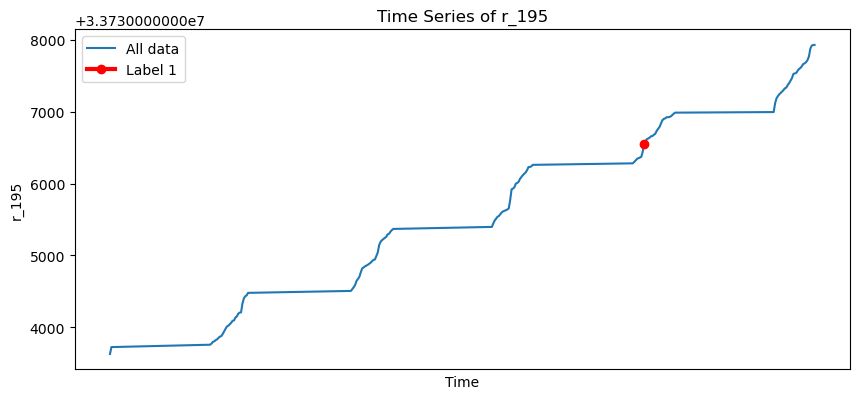

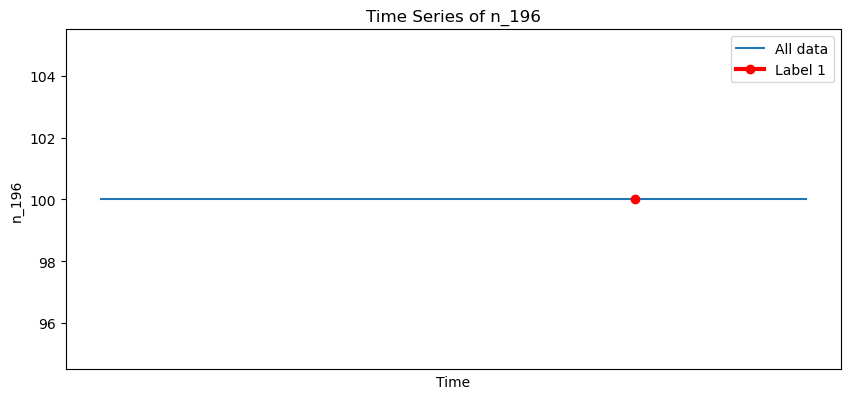

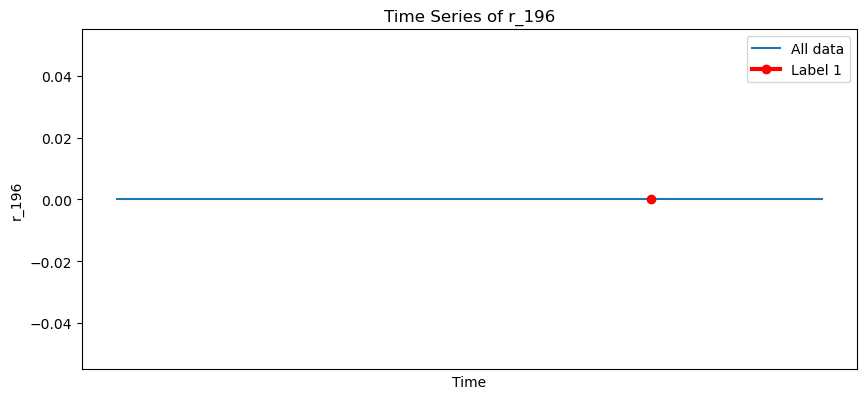

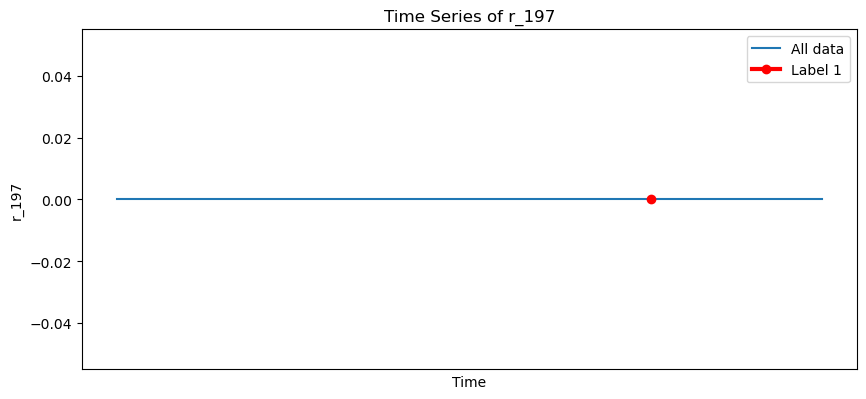

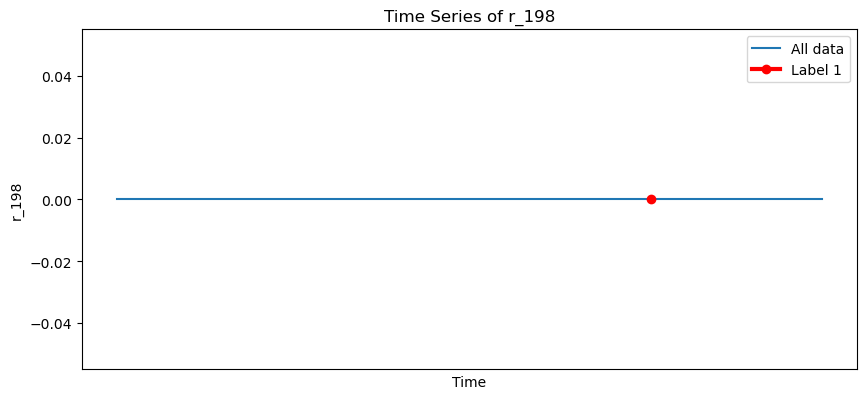

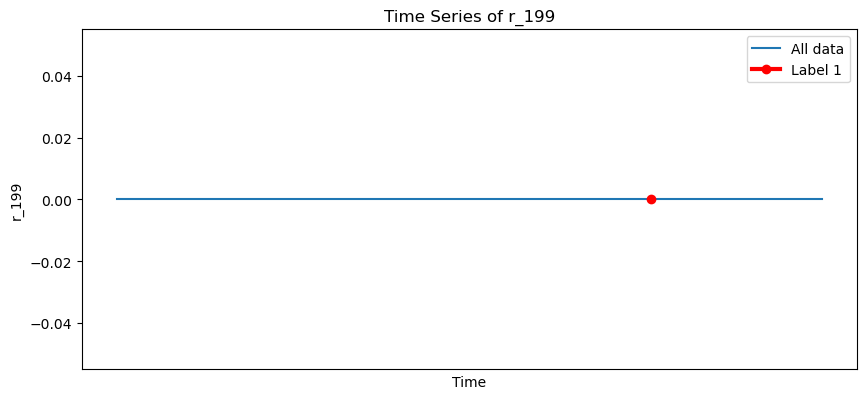

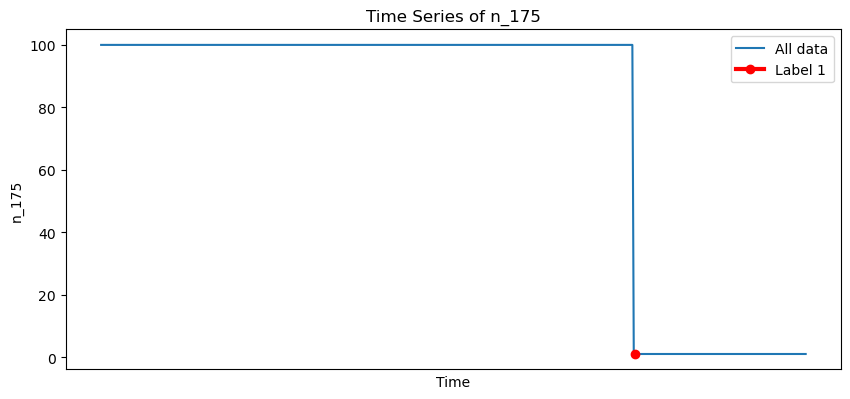

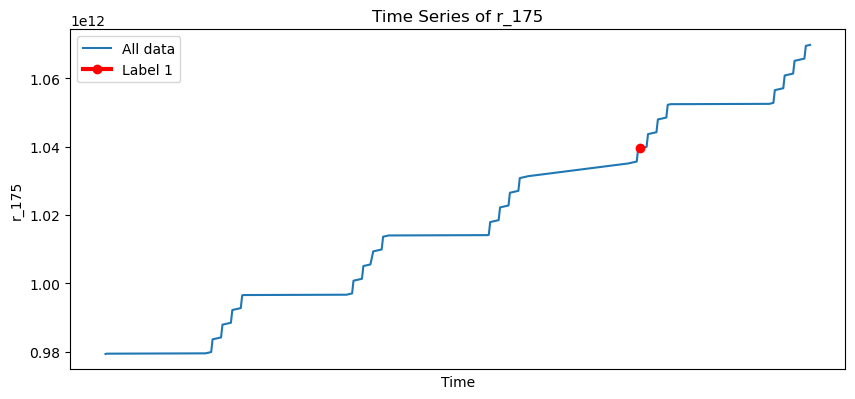

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# disk_520을 시간 순서대로 정렬
disk_520 = disk_520.sort_values('ds')

# ds 열을 datetime으로 변환
disk_520['ds'] = pd.to_datetime(disk_520['ds'])

# ds를 인덱스로 설정
disk_520.set_index('ds', inplace=True)

# label이 1인 데이터
disk_520_label1 = disk_520[disk_520['label'] == 1]

# ds와 label 열을 제외한 모든 열에 대해
for column in disk_520.drop('label', axis=1).columns:
    fig, ax = plt.subplots(figsize=(10, 5))

    # 모든 데이터 그리기
    ax.plot(disk_520.index, disk_520[column], label='All data')

    # label이 1인 데이터 빨간색으로 강조하여 그리기
    # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
    ax.plot(disk_520_label1.index, disk_520_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

    # x 축에 날짜 표시
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()

    plt.title('Time Series of ' + column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()

- 실패가 일어나니, n_175값이 1이 됨.(175=전원보호실패..)(정규화된 값(normalized value)은 테스트 실패시 1로 설정되며, 캐패시터가 과도한 온도 조건에서 테스트 된 경우 11로 설정되고, 그렇지 않으면 100으로 설정됩니다.)
- r_175는 규칙적으로 상승.

In [26]:
# 라벨이 1인 행을 필터링합니다.
selected_disk_model_1 = MA1[MA1['label'] == 1]

# 모델, disk_id, 그리고 날짜 순으로 정렬합니다.
selected_disk_model_1 = selected_disk_model_1.sort_values(by=['disk_id', 'ds'])

# disk_id와 model 열만을 선택하여 새로운 데이터 프레임에 저장합니다.
selected_disk_model_1 = selected_disk_model_1[['disk_id']].drop_duplicates().reset_index(drop=True)

# 결과 데이터 프레임을 출력합니다.
selected_disk_model_1.values.squeeze()

array([  520,  1156,  1224,  1225,  1230,  1394,  1436,  1574,  1575,
        1576,  1577,  1664,  1666,  1668,  1673,  1674,  2329,  2531,
        2802,  3401,  3634,  3638,  3641,  4402,  4597,  4800,  4805,
        4808,  4845,  4848,  4851,  4854,  5209,  5213,  5215,  5484,
        5490,  5491,  5663,  5795,  5939,  6605,  6919,  6928,  7141,
        7778,  7779,  7972,  7975,  7978,  7983,  8240,  8241,  8244,
        8693,  8699,  8701,  8857,  8883,  9574,  9576,  9815,  9875,
       10009, 10533, 11051, 11053, 11198, 11750, 11886, 11892, 12016,
       12032, 12036, 12240, 12242, 12247, 12376, 12589, 12983, 13078,
       13098, 13158, 13244, 13845, 13936, 13962, 14221, 15239, 15392,
       16121, 16147, 16324, 16494, 16523, 17235, 17549, 17555, 17766,
       17772, 17773, 17860, 17978, 18308, 18336, 18396, 18413, 18415,
       18416, 18418, 18656, 18756, 19037, 19042, 19640, 19645, 19647,
       19796, 19810, 19816, 19818, 19883, 19938, 20203, 20235, 20238,
       20239, 20810,

In [36]:
disk_1156 = disk_1156 = MA1[MA1['disk_id']==1156]
disk_1156

# disk_520을 시간 순서대로 정렬
disk_1156 = disk_1156.sort_values('ds')

# ds 열을 datetime으로 변환
disk_1156['ds'] = pd.to_datetime(disk_1156['ds'],format='%Y%m%d')

In [37]:
disk_1156

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
9189,1156,2019-01-01,4.294967e+09,98.0,0.0,38626.0,-1.0,-1.0,-1.0,-1.0,...,19.0,-1.0,100.0,0.0,-1.0,-1.0,-1.0,100.0,9.793613e+11,0
49185,1156,2019-01-02,4.294967e+09,98.0,0.0,38649.0,-1.0,-1.0,-1.0,-1.0,...,19.0,-1.0,100.0,0.0,-1.0,-1.0,-1.0,100.0,9.794553e+11,0
81940,1156,2019-01-03,4.294967e+09,98.0,0.0,38673.0,-1.0,-1.0,-1.0,-1.0,...,19.0,-1.0,100.0,0.0,-1.0,-1.0,-1.0,100.0,9.795493e+11,0
100505,1156,2019-01-04,4.294967e+09,98.0,0.0,38697.0,-1.0,-1.0,-1.0,-1.0,...,19.0,-1.0,100.0,0.0,-1.0,-1.0,-1.0,100.0,9.796433e+11,0
119376,1156,2019-01-05,4.294967e+09,98.0,0.0,38721.0,-1.0,-1.0,-1.0,-1.0,...,19.0,-1.0,100.0,0.0,-1.0,-1.0,-1.0,100.0,9.797372e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4638827,1156,2019-06-26,4.294967e+09,98.0,0.0,42830.0,-1.0,-1.0,-1.0,-1.0,...,19.0,-1.0,100.0,0.0,-1.0,-1.0,-1.0,100.0,1.086754e+12,0
4654260,1156,2019-06-27,4.294967e+09,98.0,0.0,42854.0,-1.0,-1.0,-1.0,-1.0,...,18.0,-1.0,100.0,0.0,-1.0,-1.0,-1.0,100.0,1.086848e+12,0
4686619,1156,2019-06-28,4.294967e+09,98.0,0.0,42878.0,-1.0,-1.0,-1.0,-1.0,...,18.0,-1.0,100.0,0.0,-1.0,-1.0,-1.0,100.0,1.086942e+12,0
4703970,1156,2019-06-29,4.294967e+09,98.0,0.0,42902.0,-1.0,-1.0,-1.0,-1.0,...,18.0,-1.0,100.0,0.0,-1.0,-1.0,-1.0,100.0,1.087036e+12,0


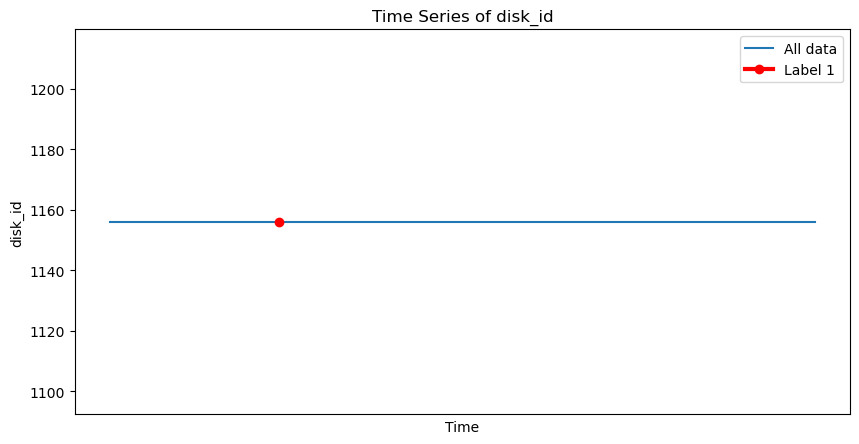

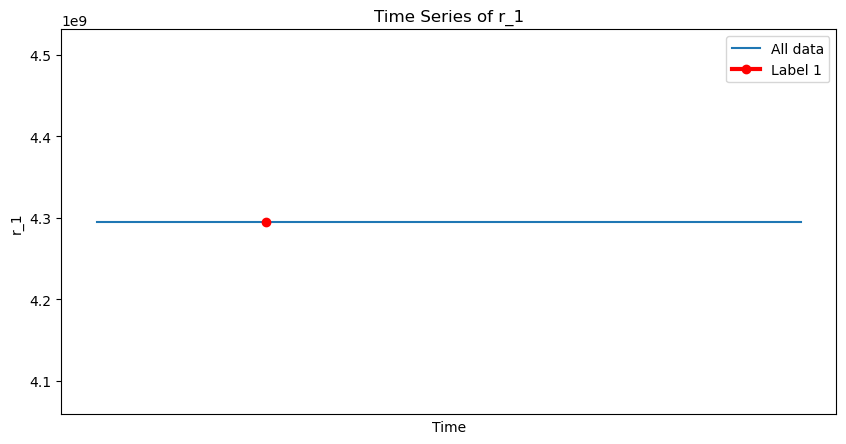

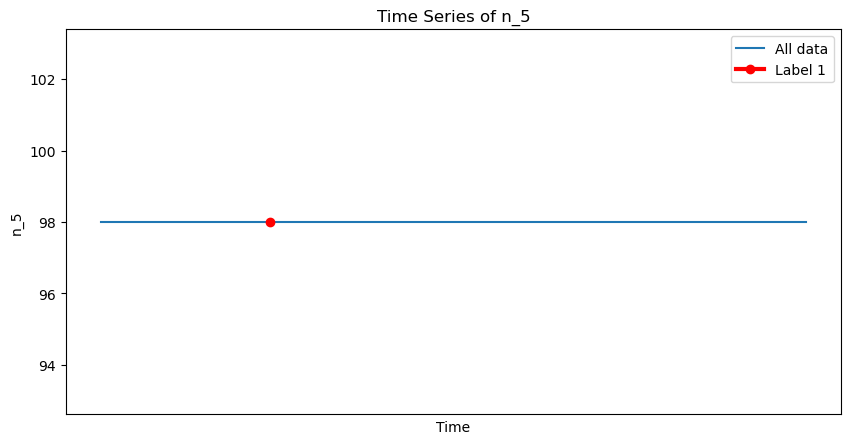

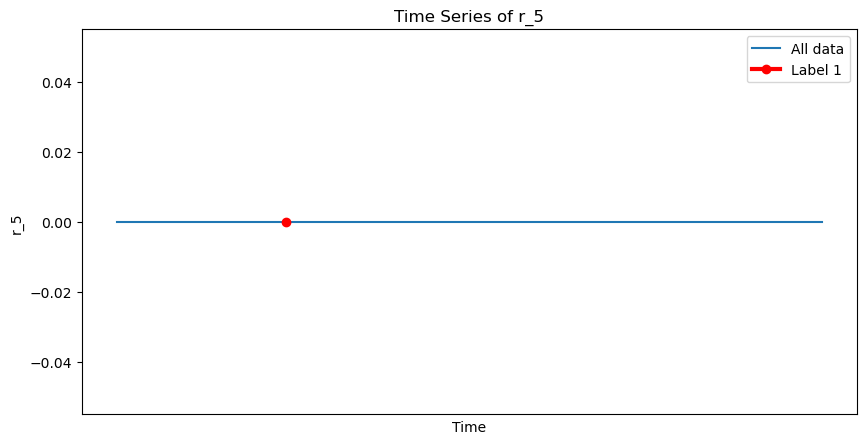

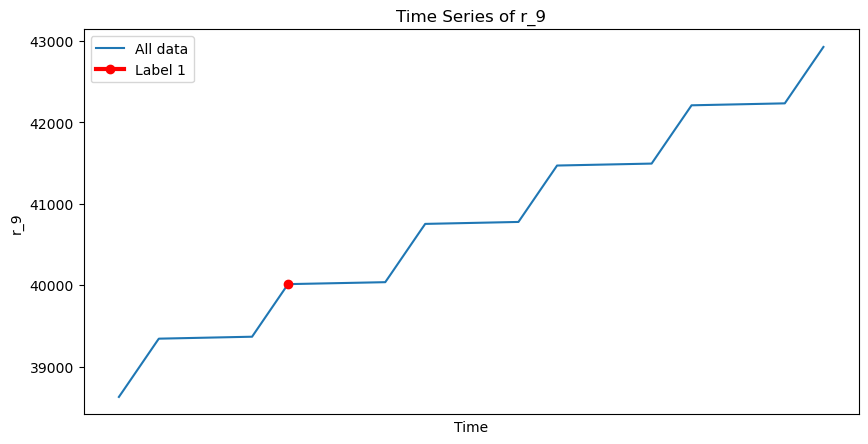

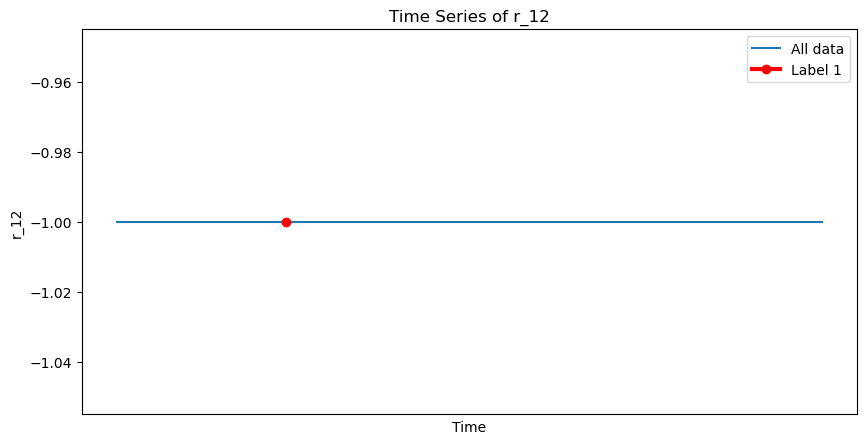

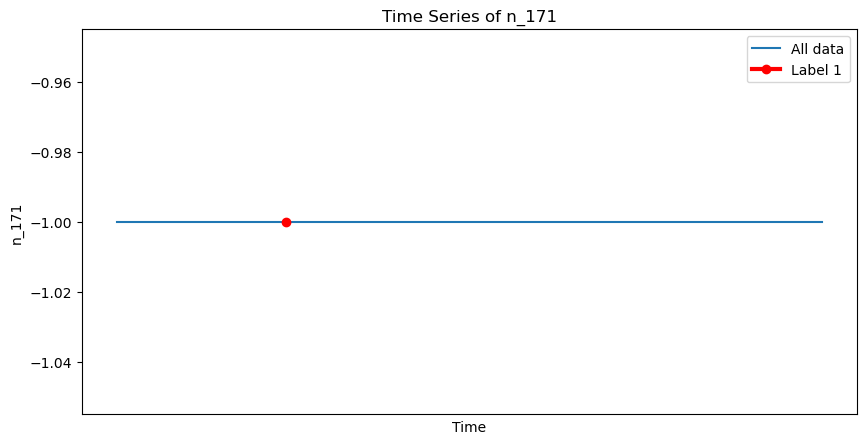

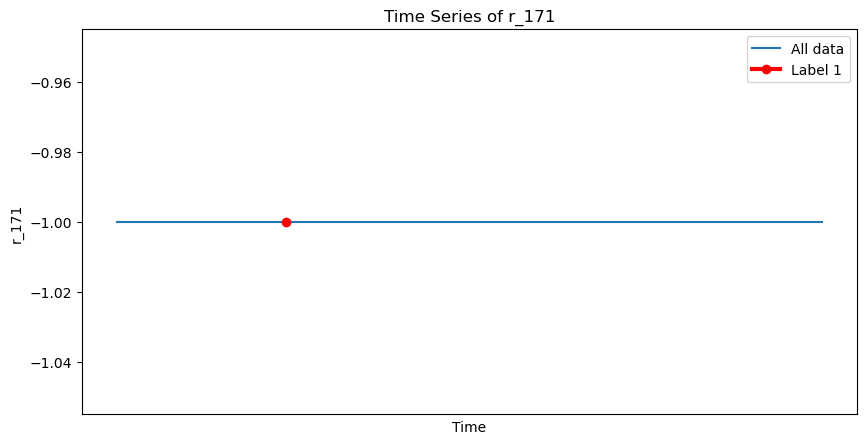

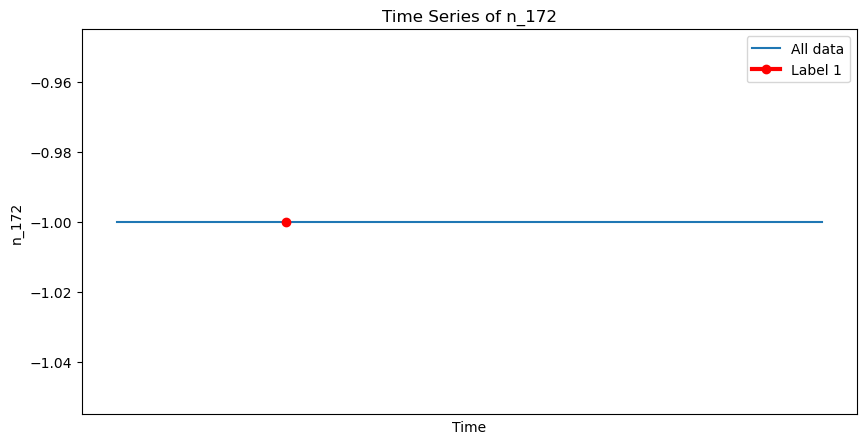

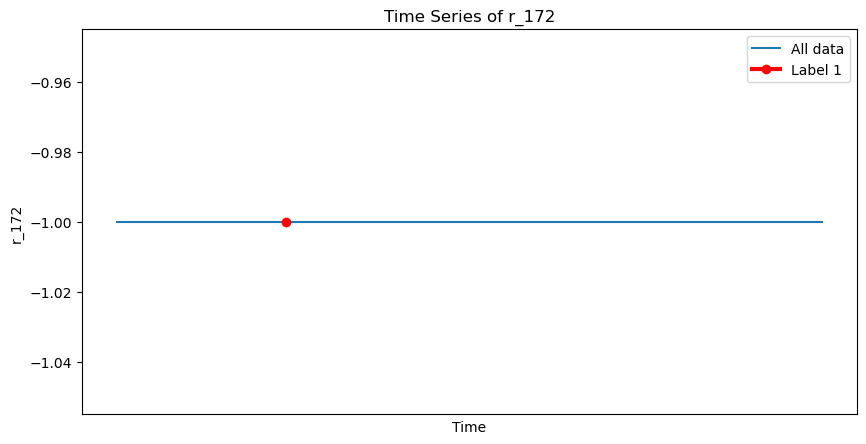

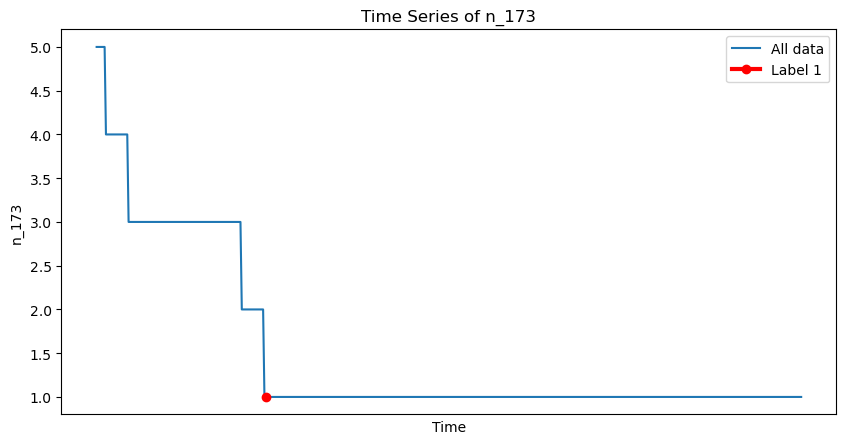

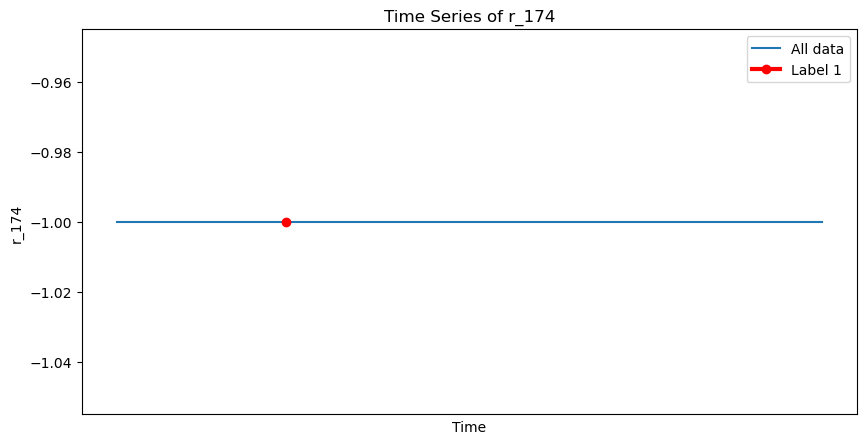

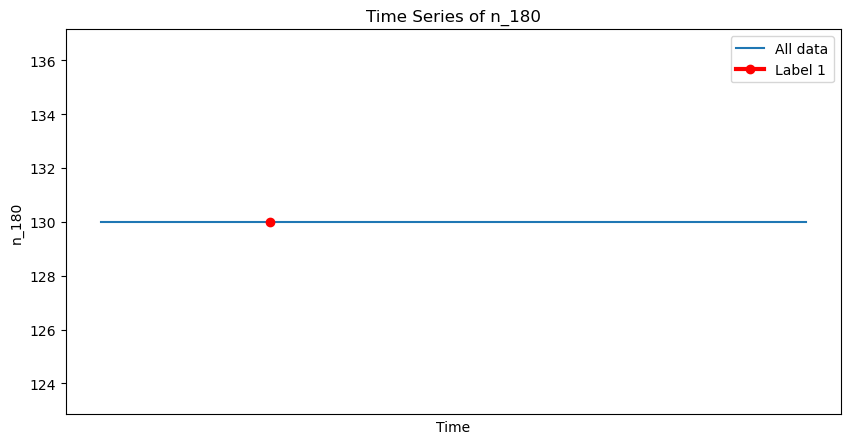

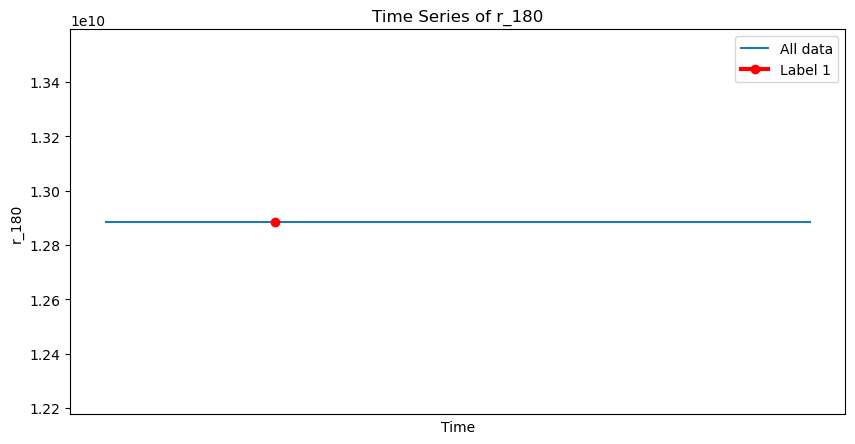

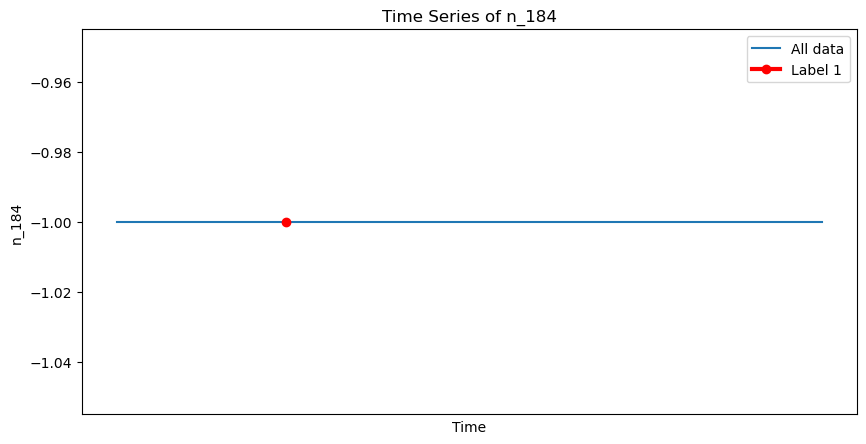

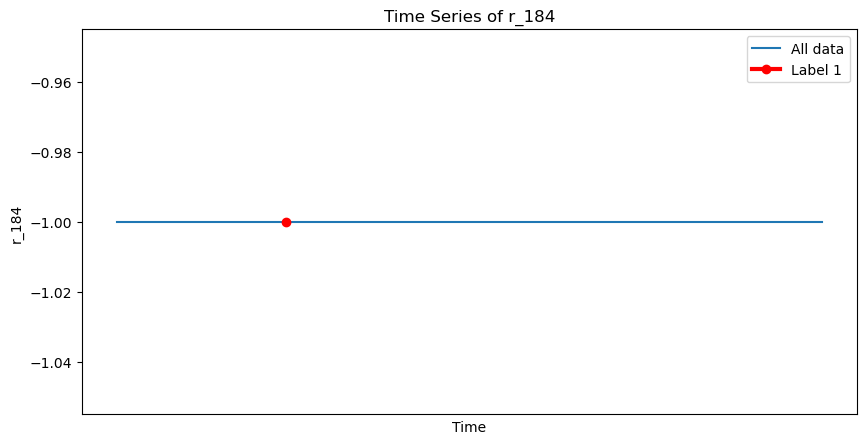

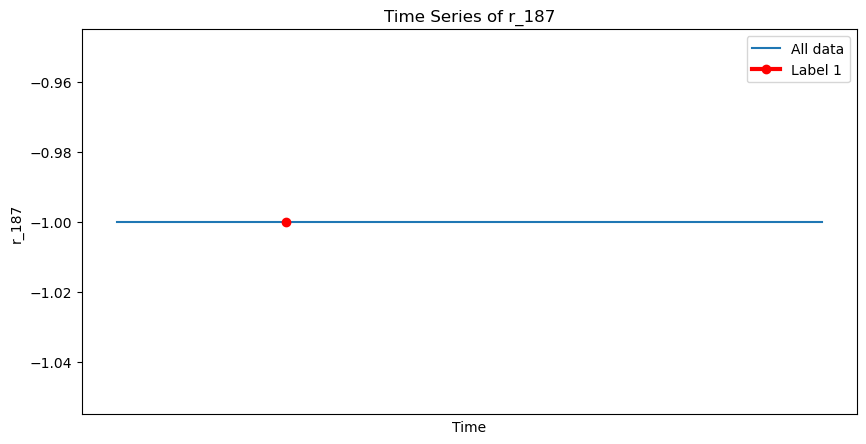

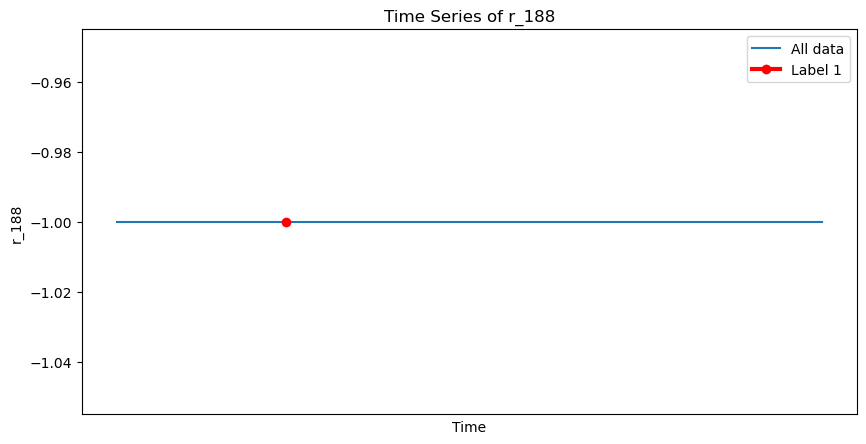

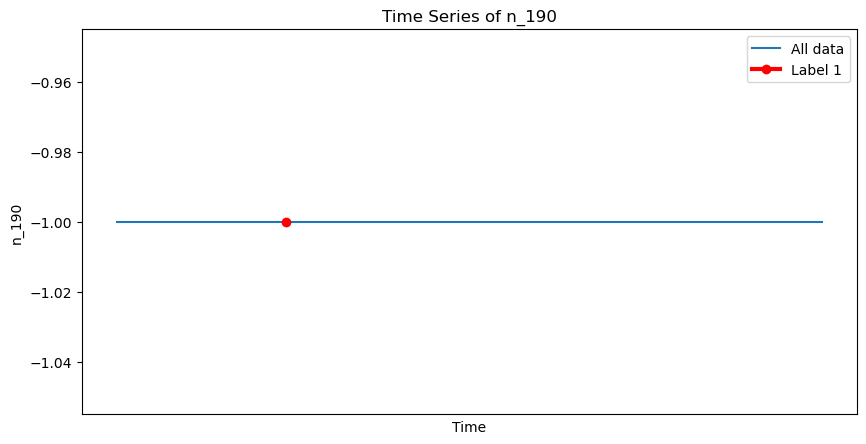

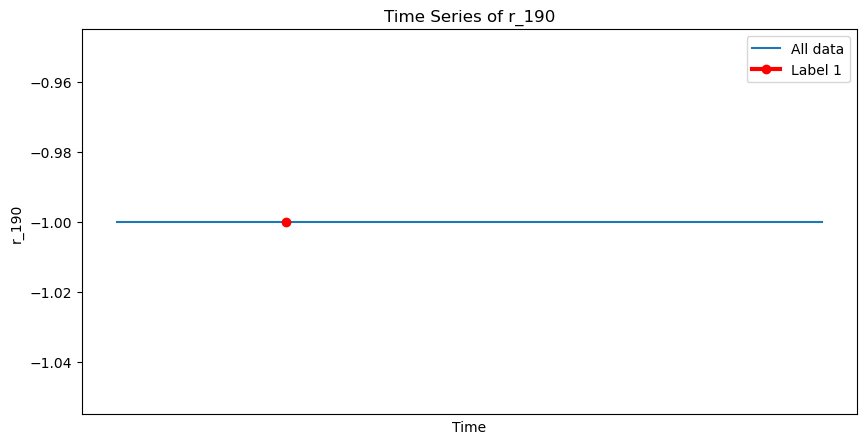

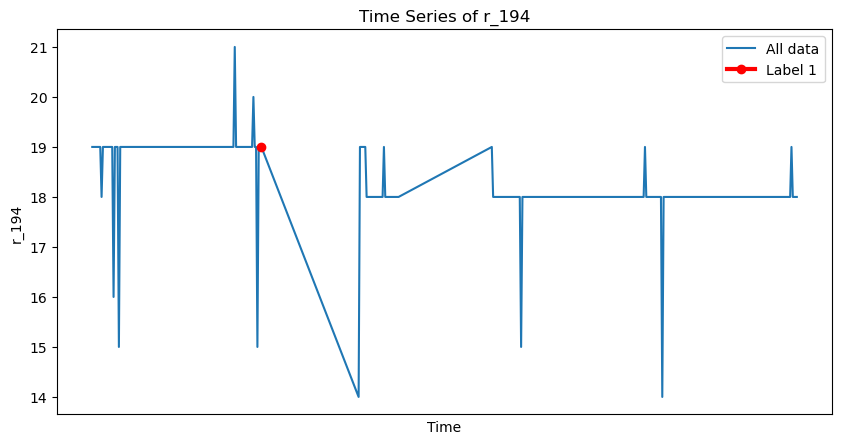

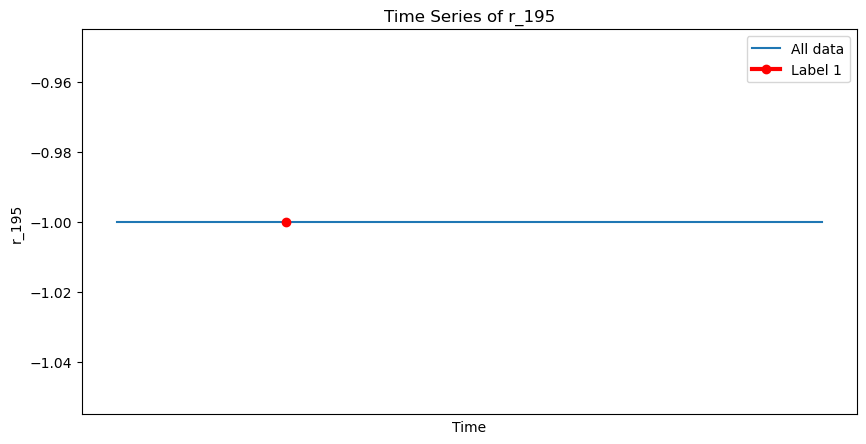

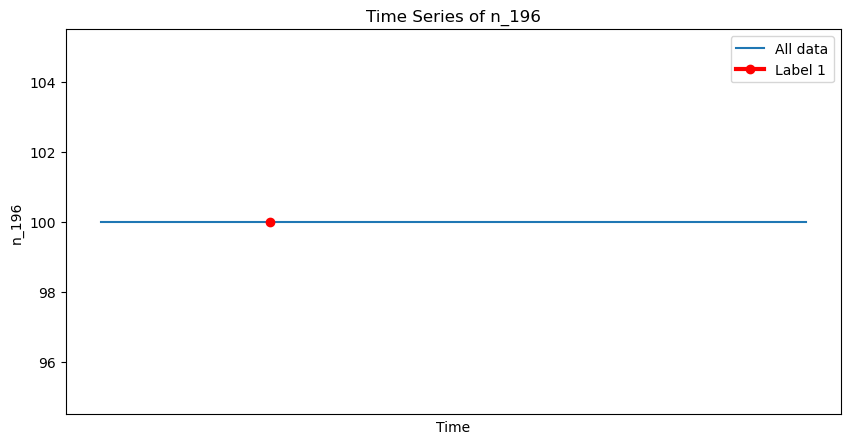

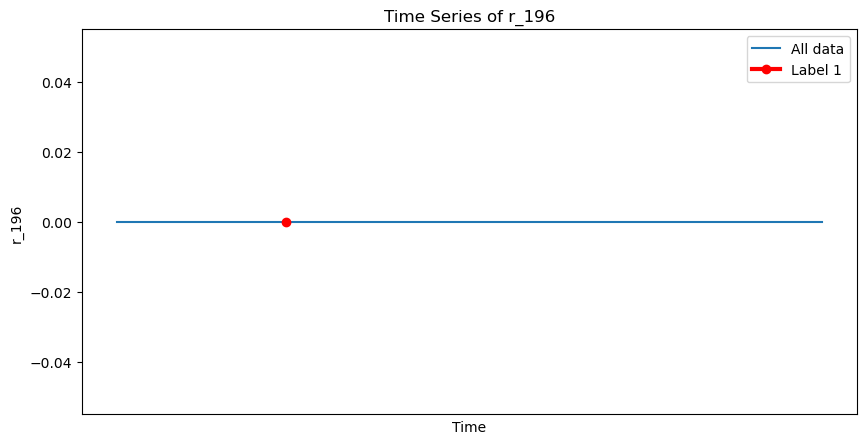

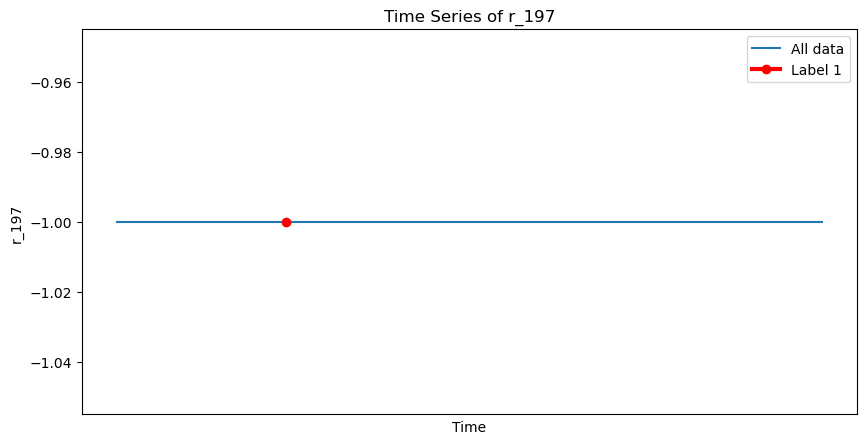

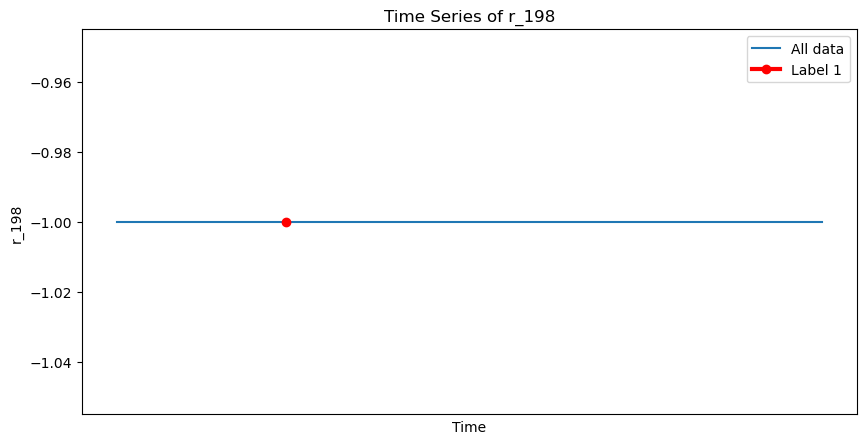

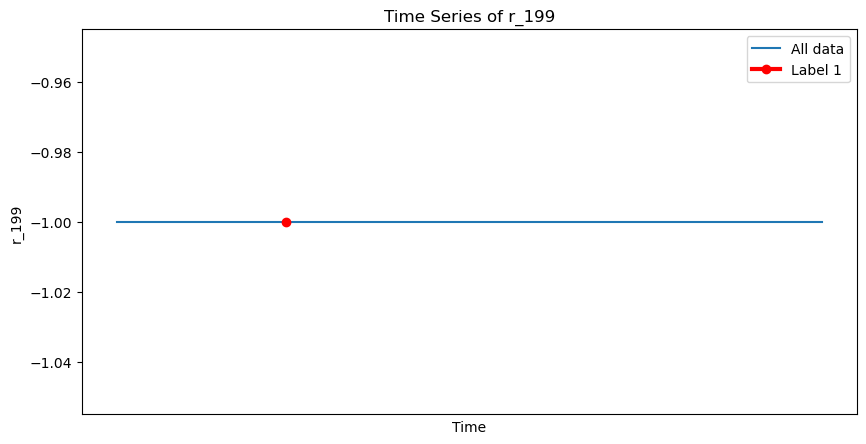

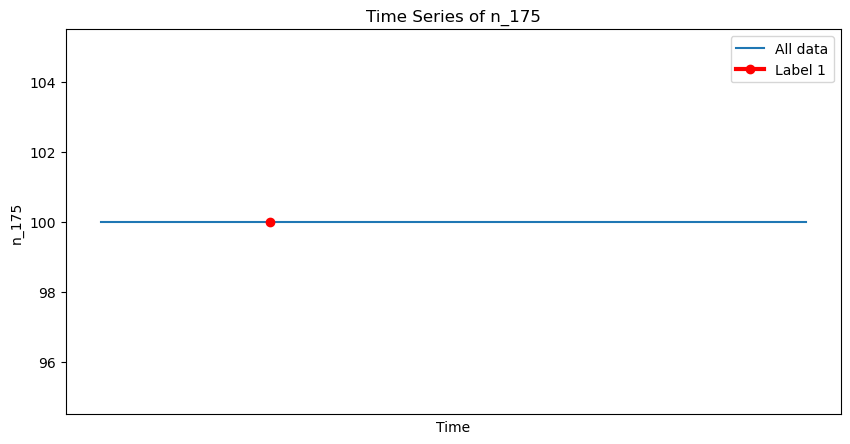

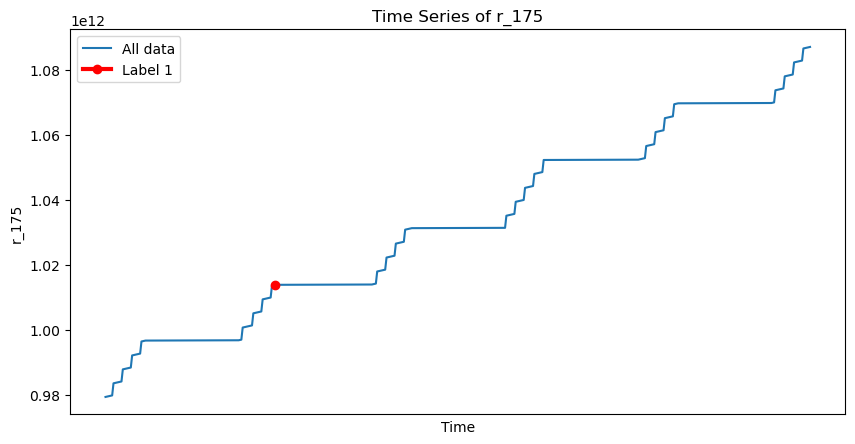

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

disk_1156 = disk_1156 = MA1[MA1['disk_id']==1156]
disk_1156

# disk_520을 시간 순서대로 정렬
disk_1156 = disk_1156.sort_values('ds')

# ds 열을 datetime으로 변환
disk_1156['ds'] = pd.to_datetime(disk_1156['ds'])

# ds를 인덱스로 설정
disk_1156.set_index('ds', inplace=True)

# label이 1인 데이터
disk_520_label1 = disk_1156[disk_1156['label'] == 1]

# ds와 label 열을 제외한 모든 열에 대해
for column in disk_1156.drop('label', axis=1).columns:
    plt.figure(figsize=(10, 5))

    # 모든 데이터 그리기
    plt.plot(disk_1156.index, disk_1156[column], label='All data')

    # label이 1인 데이터 빨간색으로 강조하여 그리기
    # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
    plt.plot(disk_520_label1.index, disk_520_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

    plt.title('Time Series of ' + column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()

- 520과 달리 n_175는 그대로 100을 가짐. => 520 과는 다른 원인으로 실패했다는건데...
- n_190, r_190이 모두 -1로 원래 nan값을 가졌던것을 알 수 있음
- 520에서는 두 값이 모두 존재했는데, 여기서는 왜 없을까???
- n_173이 1156에서는 실패시에 뚝 떨어짐
- n_173은 "SSD 웨어 레벨링 수" = "모든 블록에서 최대 최악의 지우기 횟수를 계산합니다."
- norm값이 5 => 1 로...무슨 의미일까?

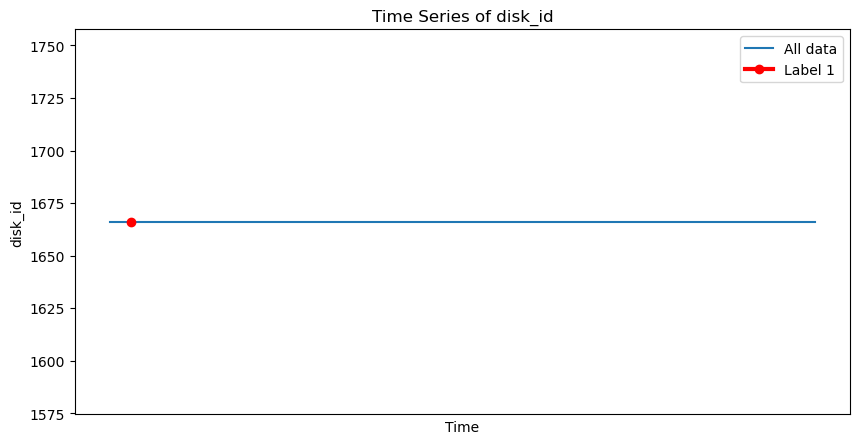

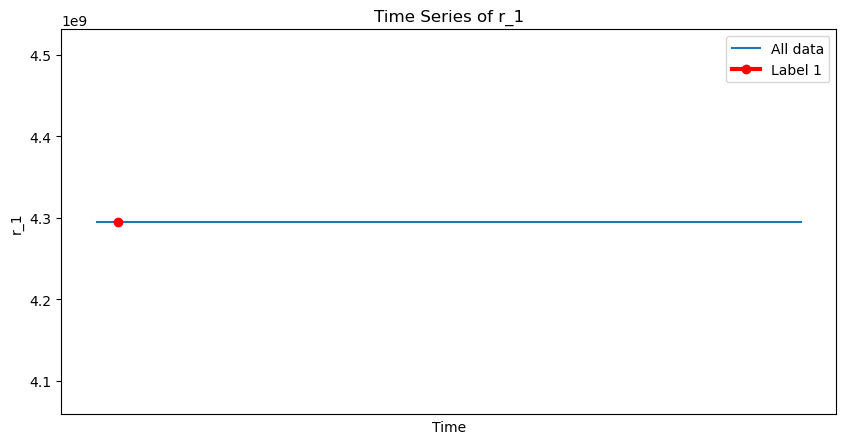

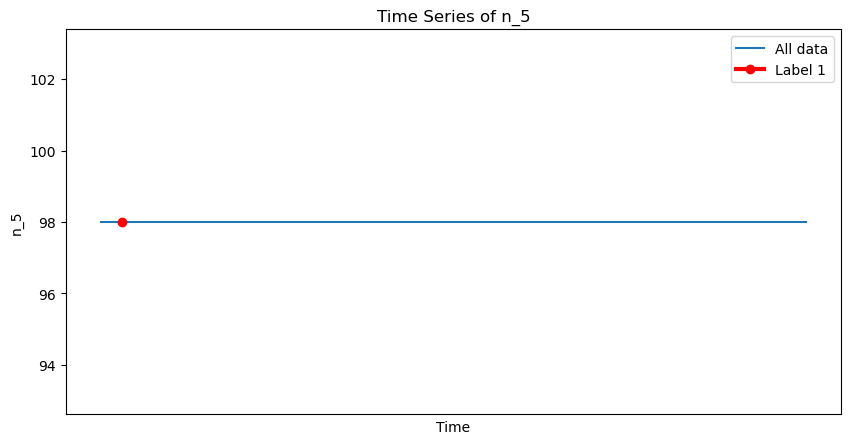

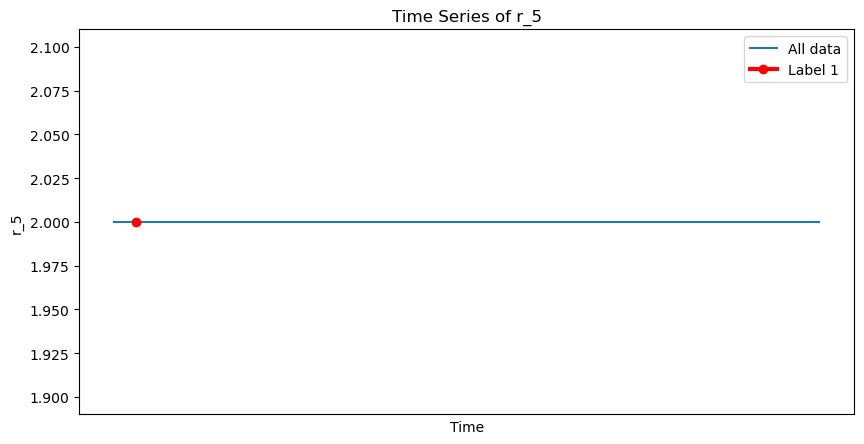

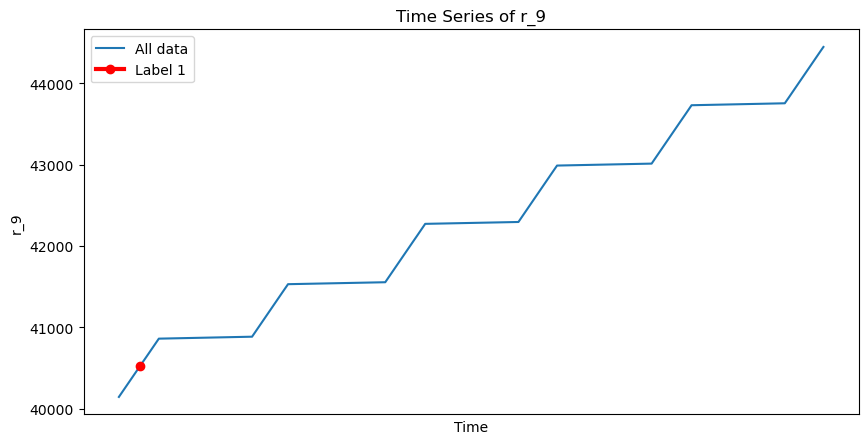

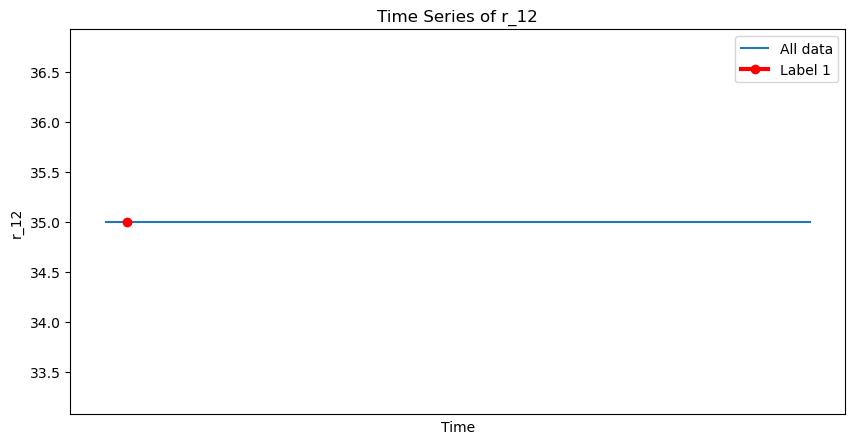

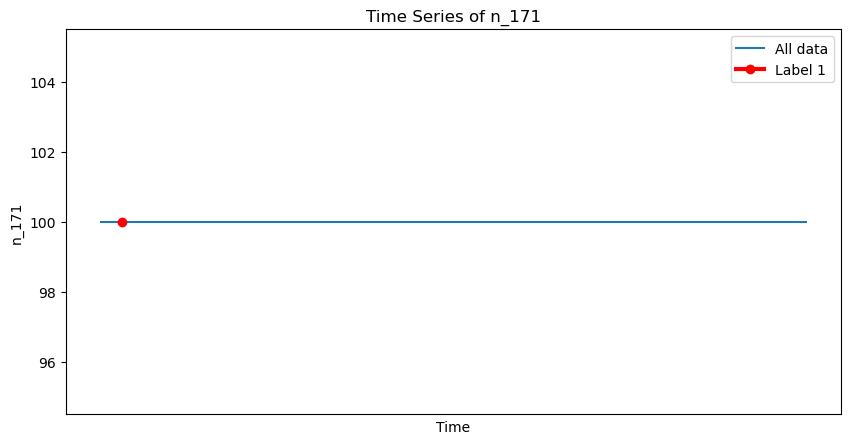

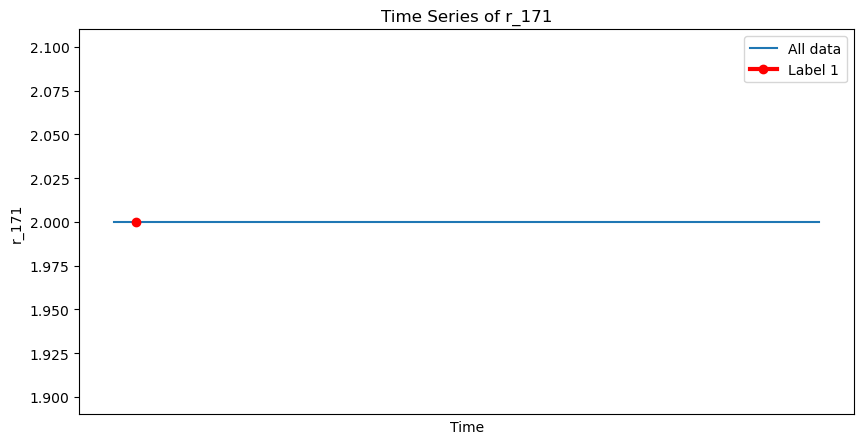

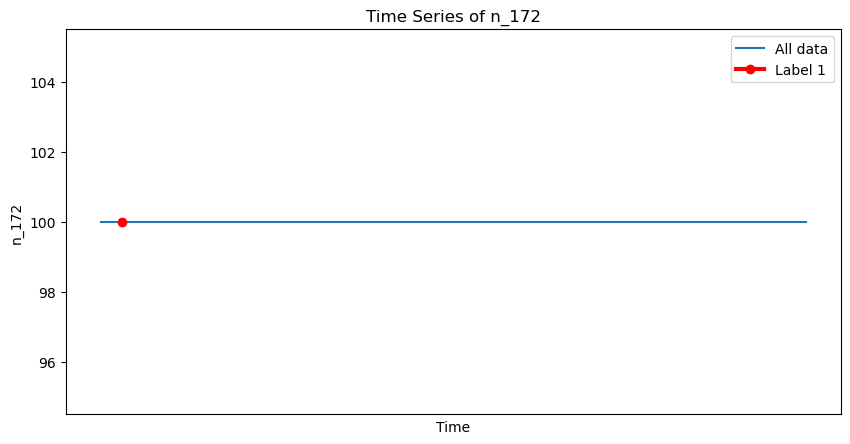

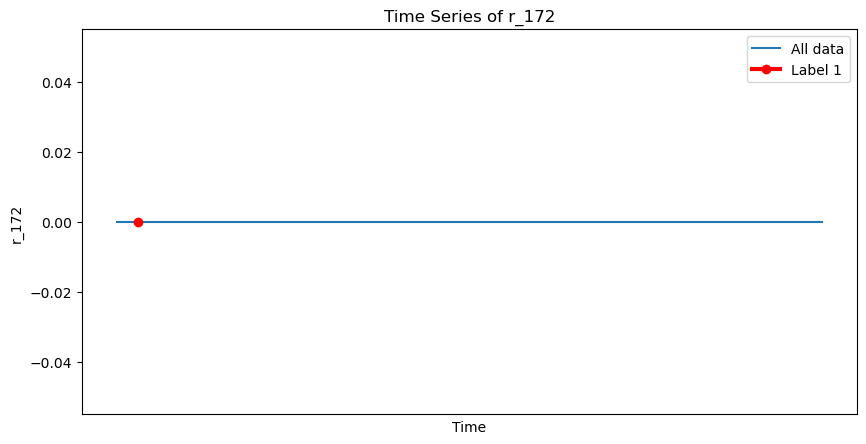

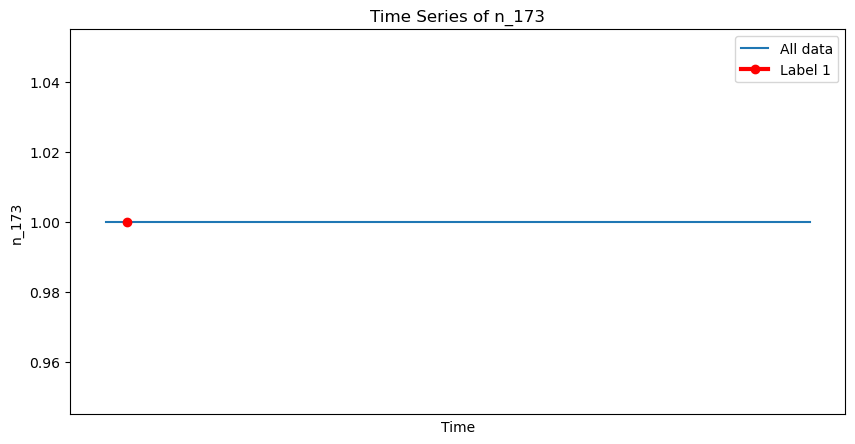

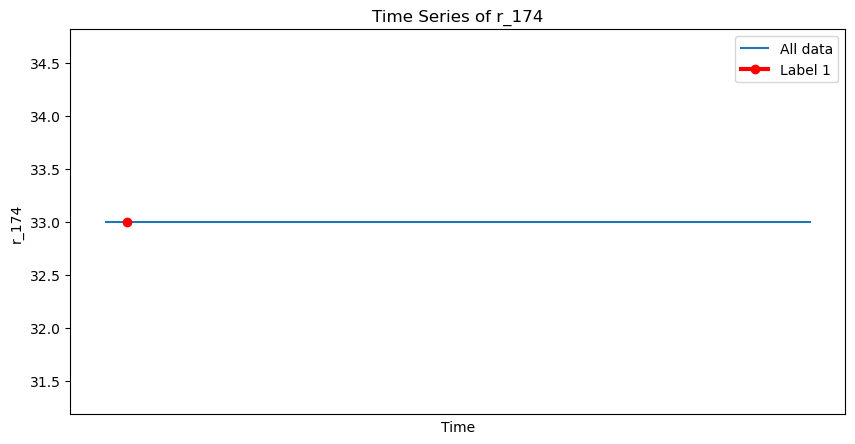

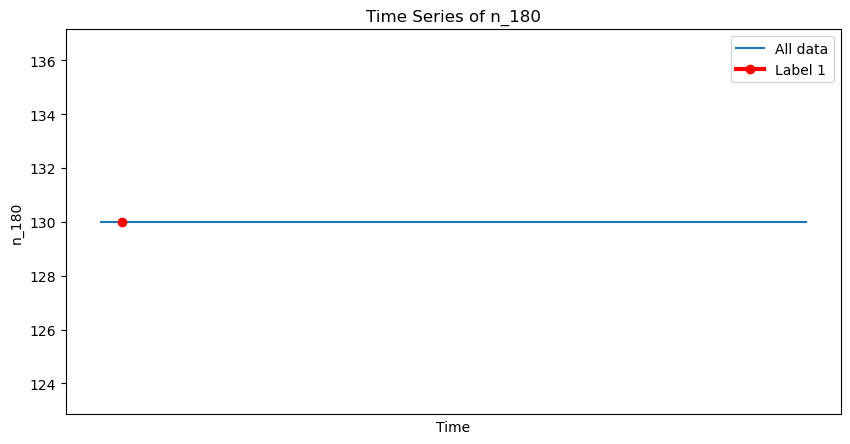

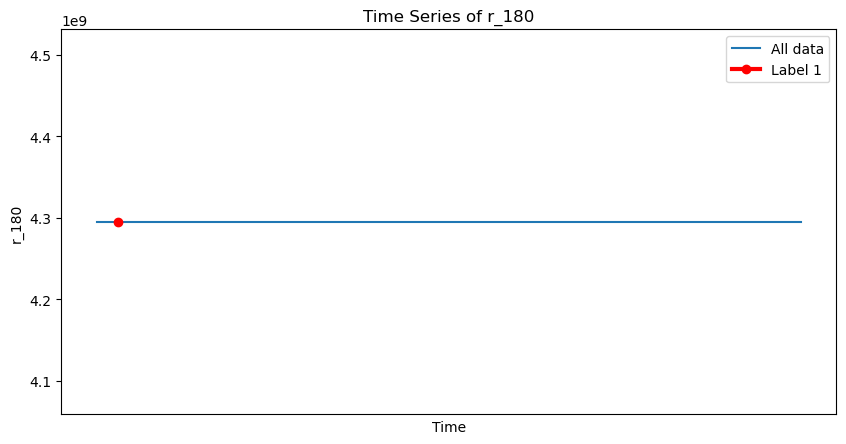

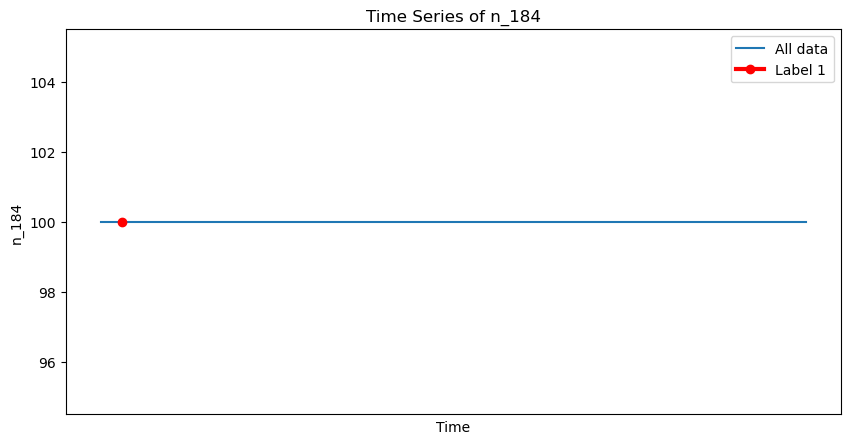

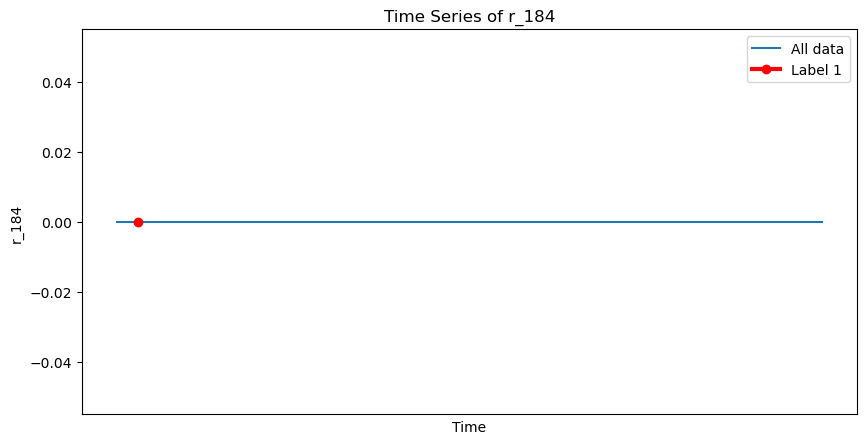

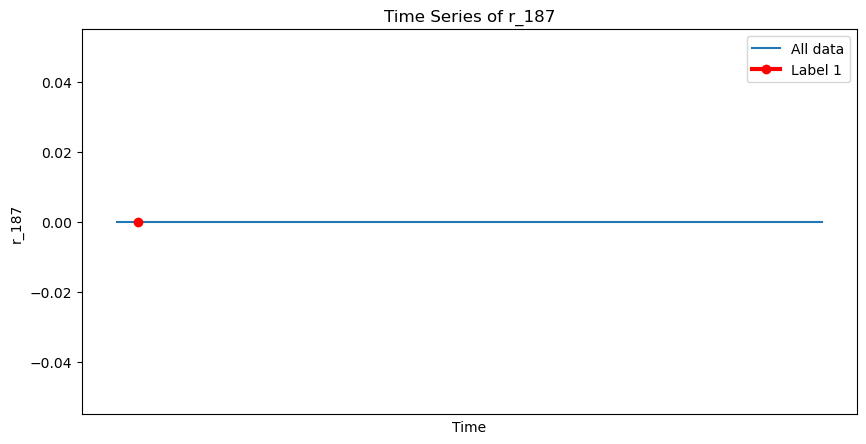

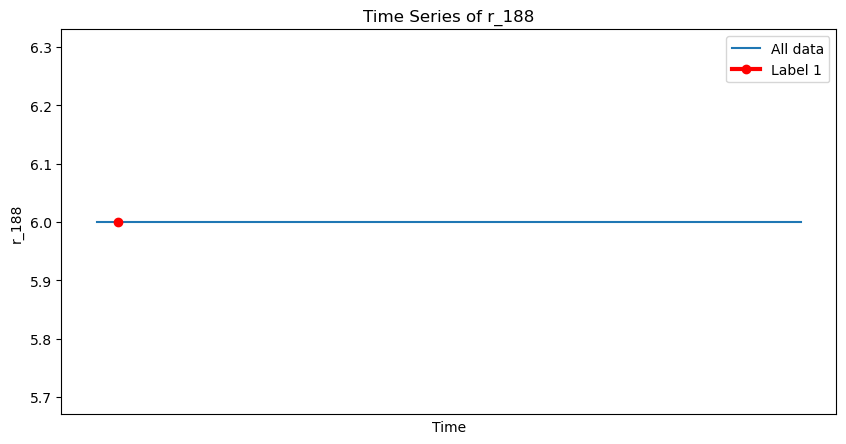

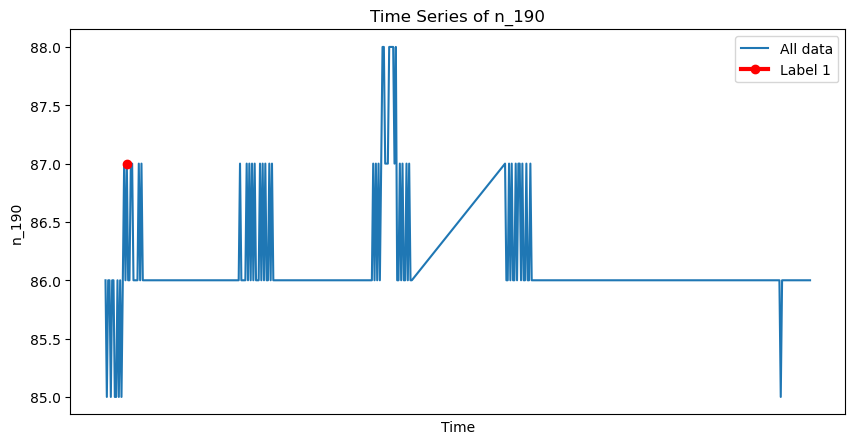

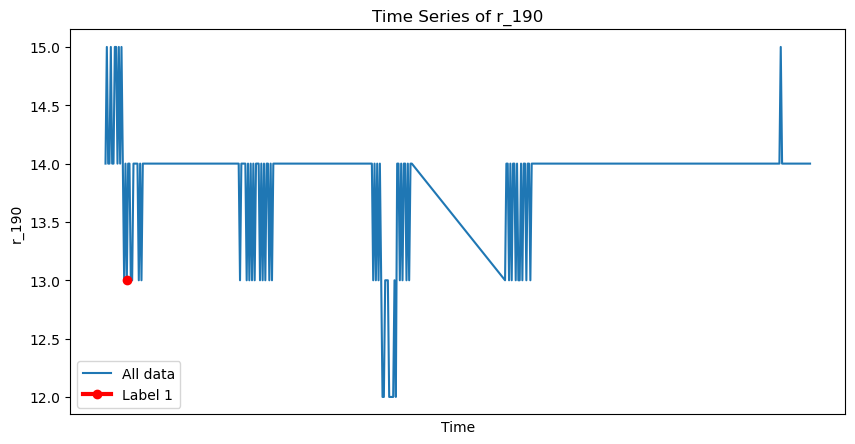

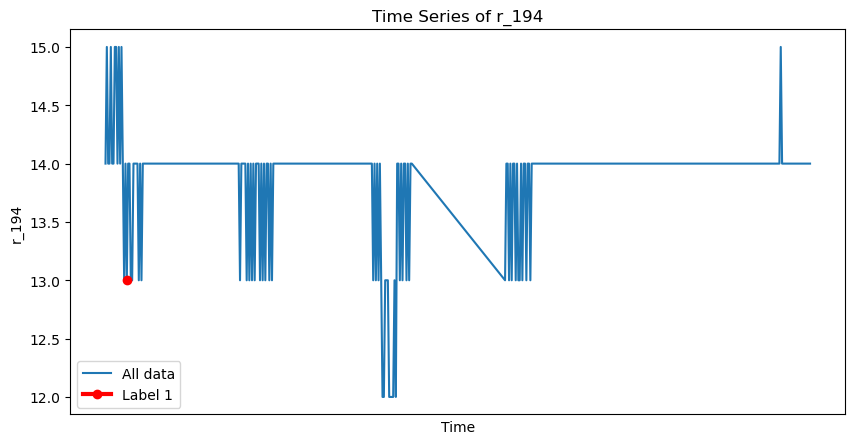

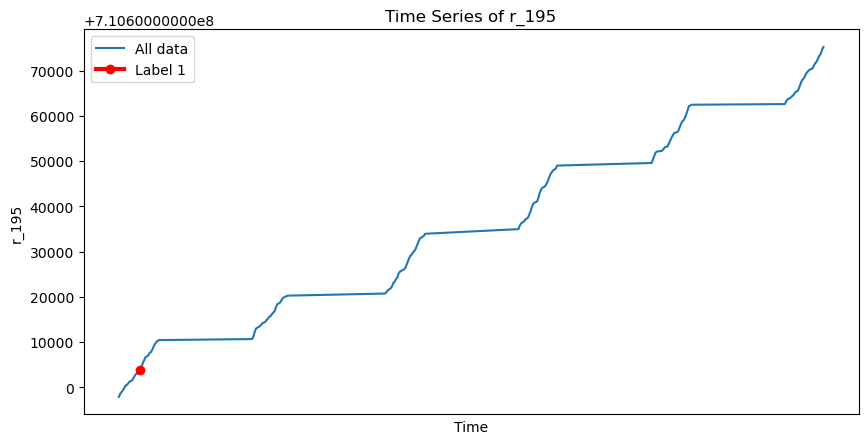

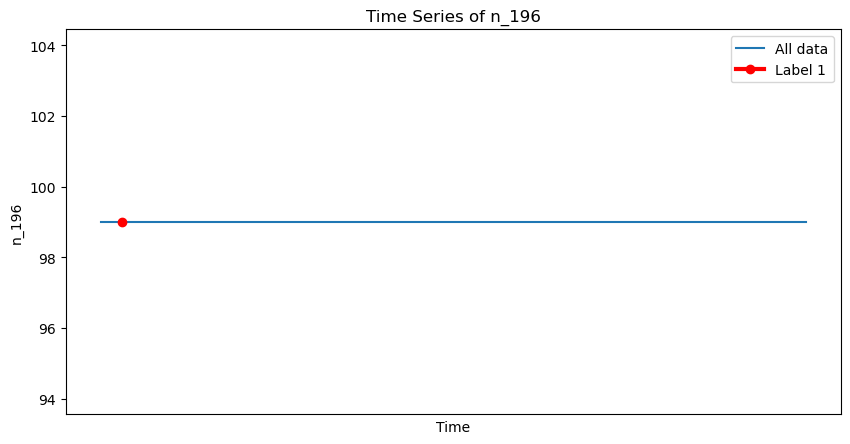

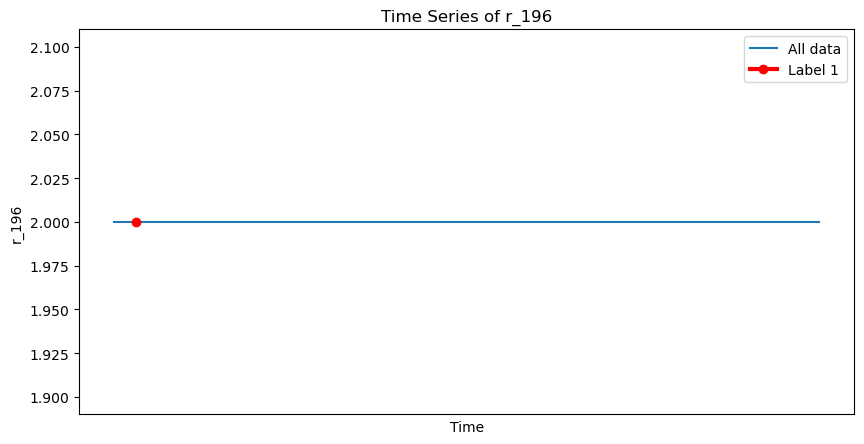

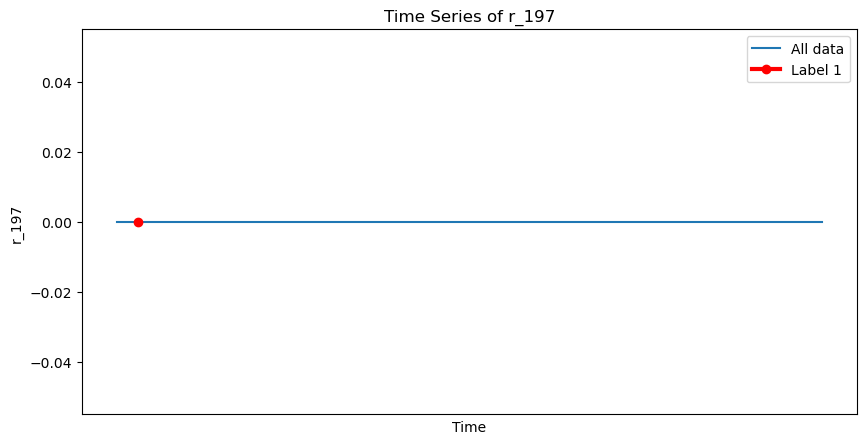

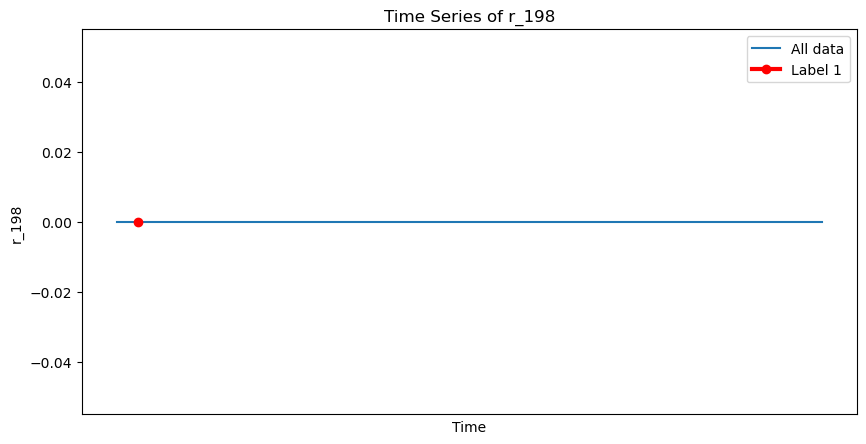

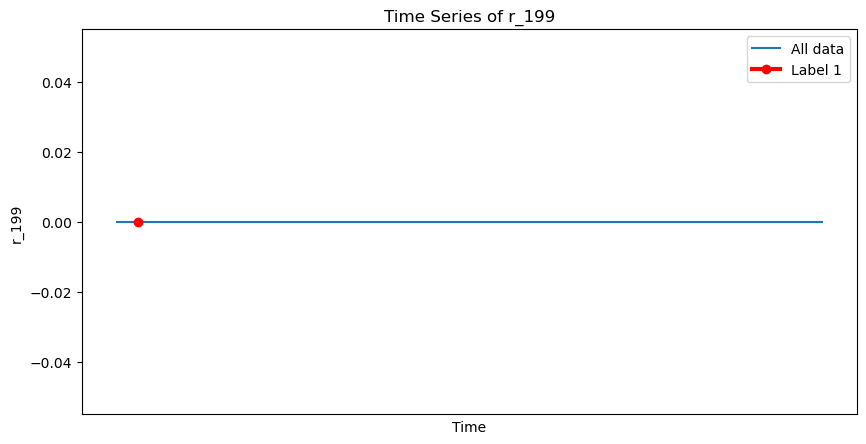

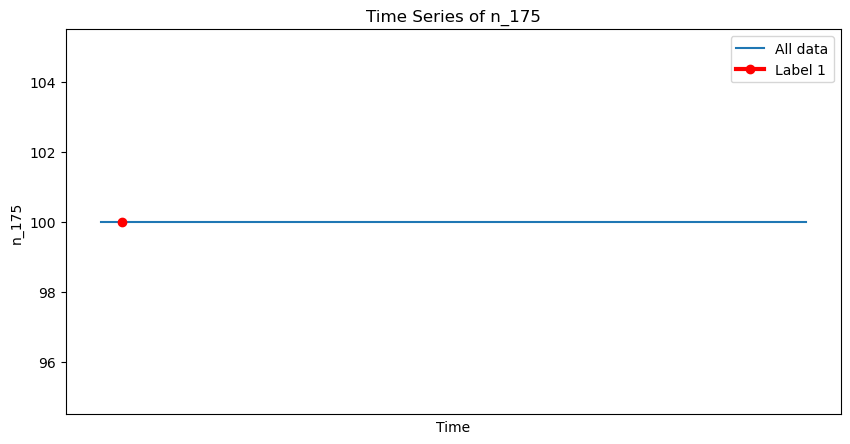

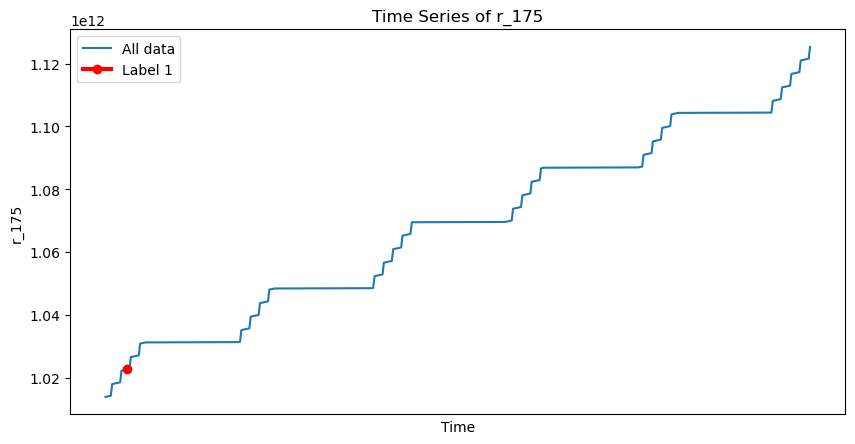

In [39]:
disk_1666 = disk_1666 = MA1[MA1['disk_id']==1666]
disk_1666

# disk_520을 시간 순서대로 정렬
disk_1666 = disk_1666.sort_values('ds')

# ds 열을 datetime으로 변환
disk_1666['ds'] = pd.to_datetime(disk_1666['ds'])

# ds를 인덱스로 설정
disk_1666.set_index('ds', inplace=True)

# label이 1인 데이터
disk_520_label1 = disk_1666[disk_1666['label'] == 1]

# ds와 label 열을 제외한 모든 열에 대해
for column in disk_1666.drop('label', axis=1).columns:
    plt.figure(figsize=(10, 5))

    # 모든 데이터 그리기
    plt.plot(disk_1666.index, disk_1666[column], label='All data')

    # label이 1인 데이터 빨간색으로 강조하여 그리기
    # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
    plt.plot(disk_520_label1.index, disk_520_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

    plt.title('Time Series of ' + column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()